<a href="https://colab.research.google.com/github/Rod0Lucas/Arbnb_Analysis/blob/main/Arbnb_Analysis(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This San-Francisco based startup offers you someone’s home as a place to stay instead of a hotel.  But doesn't owns any property instead acts as an intermediary between those who want to rent out space and those who are looking for space to rent. 🙂

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Impots

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread

In [ ]:
df_air = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Mexico City 2021.csv')
df_air

id                                               name    host_id  \
0         35797                                        Villa Dante     153786   
1         44616                                  CONDESA HAUS  B&B     196253   
2         56074               Great space in historical San Rafael     265650   
3         61792  Spacious Clean Quiet room (own bath) in la Con...     299558   
4         67703                  2 bedroom apt. deco bldg, Condesa     334451   
...         ...                                                ...        ...   
19650  53970957                          Roma Norte cozy apartment   60203647   
19651  53972348      Amazing apartment in the best area of Polanco    5126969   
19652  53972929  Loft Tecamachalco 500m de Palmas Lomas Chapult...  437211246   
19653  53974082  Cuarto Privado Mediano -PH Compartido, Lomas CDMX   21823424   
19654  53974350  Cómoda habitación con dos camas individuales m...  347353318   

                                host_name  neighbourhood_group  \
0                                    Dici                  NaN   
1      Condesa Haus Bed & Breakfast  CDMX                  NaN   
2                                   Maris                  NaN   
3                                 Roberto                  NaN   
4                                Nicholas                  NaN   
...                                   ...                  ...   
19650                          Alex Y May                  NaN   
19651                        Jose Alfonso                  NaN   
19652                    Maria Del Carmen                  NaN   
19653                            Federico                  NaN   
19654                               Julio                  NaN   

               neighbourhood   latitude  longitude        room_type  price  \
0      Cuajimalpa de Morelos  19.382830 -99.271780  Entire home/apt   4123   
1                 Cuauhtémoc  19.411620 -99.177940  Entire home/apt  15000   
2                 Cuauhtémoc  19.439770 -99.156050  Entire home/apt    600   
3                 Cuauhtémoc  19.410830 -99.180570     Private room   1237   
4                 Cuauhtémoc  19.411520 -99.168570  Entire home/apt   1959   
...                      ...        ...        ...              ...    ...   
19650             Cuauhtémoc  19.414141 -99.164360  Entire home/apt    905   
19651         Miguel Hidalgo  19.429930 -99.185967  Entire home/apt   1520   
19652         Miguel Hidalgo  19.429134 -99.226526     Private room    480   
19653         Miguel Hidalgo  19.419214 -99.233233     Private room    339   
19654               Coyoacán  19.343215 -99.148787     Private room    200   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
0                   1                  0         NaN                NaN   
1                   1                 50  2021-08-23               0.41   
2                   2                 66  2021-11-21               0.50   
3                   2                 53  2021-12-13               1.05   
4                   4                 39  2019-02-24               0.32   
...               ...                ...         ...                ...   
19650               1                  1  2021-12-24               1.00   
19651               2                  0         NaN                NaN   
19652               7                  0         NaN                NaN   
19653               1                  0         NaN                NaN   
19654               1                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  \
0                                   1               363   
1                                  10               344   
2                                   2               364   
3                                   1               178   
4                                   2               332   
...                               ...               ...

# Data Exploration & Variable Identification:

In [ ]:
# Check what are the variables.
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
# Basic information about the dataset
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19655 non-null  int64  
 1   name                            19652 non-null  object 
 2   host_id                         19655 non-null  int64  
 3   host_name                       19654 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   19655 non-null  object 
 6   latitude                        19655 non-null  float64
 7   longitude                       19655 non-null  float64
 8   room_type                       19655 non-null  object 
 9   price                           19655 non-null  int64  
 10  minimum_nights                  19655 non-null  int64  
 11  number_of_reviews               19655 non-null  int64  
 12  last_review                     

In [ ]:
df_air['id'].nunique()

19655

Upon basic inspection, note that the particular property name will have a particular hostname hosted by that same person, but a particular hostname may have multiple properties in an area.

So host_name is a categorical variable here. Also neighborhood and room_type fall into this category.

While id, latitude, longitude, price, min_nights, number_of_reviews, last_review, reviews_per_month calculated_host_listings_count, availability_365 are numeric variables

neighborhood_group and license are both empty

In [ ]:
# Looking out for categorical variables
df_air.loc[df_air['name'] == 'Cuarto Privado Mediano -PH Compartido, Lomas CDMX']

id                                               name   host_id  \
19653  53974082  Cuarto Privado Mediano -PH Compartido, Lomas CDMX  21823424   

      host_name  neighbourhood_group   neighbourhood   latitude  longitude  \
19653  Federico                  NaN  Miguel Hidalgo  19.419214 -99.233233   

          room_type  price  minimum_nights  number_of_reviews last_review  \
19653  Private room    339               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
19653                NaN                               1               180   

       number_of_reviews_ltm  license  
19653                      0      NaN

In [ ]:
df_air[df_air['host_name'] == 'Federico'] # Experimenting 

id                                               name    host_id  \
180     2093036                Departamento 2 dormitorios x Antara    3083561   
1061   10343332                 Roma Sur, excelente locación, loft    1491836   
1150   11047706                        HOME INN SUITES / SAN ÁNGEL   57330603   
2596   17540988                      Cozy apartment near San Angel   94967270   
4533   23628531           Excelente habitación totalmente equipada  124763349   
7107   32083656                        Estancia Santa Rosa de Lima   44679653   
8445   35534856    Penthouse Exclusivo, En Av. Paseo de la Reforma  216483893   
10552  40487389                         Habitacion en col. CONDESA  151580830   
11420  42205665  Excellent location!!! /new POLANCO /EXCLUSIVE APT  230418890   
14859  48241465                                      Suite 1 CARSO  389230991   
16183  50285417                       Intimate refuge in San Ángel   94967270   
17018  51409427  Departamento con terraza a media cuadra del ángel   22755111   
17829  52384491  ‼️Habitaciones  a 2 cuadras del “Estadio Azulg...  233499012   
17947  52496767                                      Suite 2 Carso  389230991   
17948  52497133                                      Suite 3 Carso  389230991   
18662  53132596                                     Suite  4 Carso  389230991   
18739  53199813   ‼️📌 Cálida habitación con baño independiente ‼️📌  233499012   
19653  53974082  Cuarto Privado Mediano -PH Compartido, Lomas CDMX   21823424   

      host_name  neighbourhood_group   neighbourhood   latitude  longitude  \
180    Federico                  NaN  Miguel Hidalgo  19.441780 -99.202020   
1061   Federico                  NaN      Cuauhtémoc  19.403150 -99.165550   
1150   Federico                  NaN  Álvaro Obregón  19.362530 -99.188480   
2596   Federico                  NaN  Álvaro Obregón  19.354960 -99.187850   
4533   Federico                  NaN         Tlalpan  19.305890 -99.130500   
7107   Federico                  NaN      Cuauhtémoc  19.409590 -99.175920   
8445   Federico                  NaN      Cuauhtémoc  19.434160 -99.152980   
10552  Federico                  NaN      Cuauhtémoc  19.412080 -99.178140   
11420  Federico                  NaN  Miguel Hidalgo  19.445030 -99.202980   
14859  Federico                  NaN  Miguel Hidalgo  19.444996 -99.195267   
16183  Federico                  NaN  Álvaro Obregón  19.354227 -99.189011   
17018  Federico                  NaN      Cuauhtémoc  19.425392 -99.165304   
17829  Federico                  NaN   Benito Juárez  19.385470 -99.179120   
17947  Federico                  NaN  Miguel Hidalgo  19.444895 -99.195290   
17948  Federico                  NaN  Miguel Hidalgo  19.445456 -99.194740   
18662  Federico                  NaN  Miguel Hidalgo  19.444350 -99.194570   
18739  Federico                  NaN   Benito Juárez  19.386909 -99.180552   
19653  Federico                  NaN  Miguel Hidalgo  19.419214 -99.233233   

             room_type  price  minimum_nights  number_of_reviews last_review  \
180       Private room   3197               1                  0         NaN   
1061   Entire home/apt    887               1                355  2021-11-13   
1150   Entire home/apt    618               2                244  2021-12-15   
2596   Entire home/apt    749             120                117  2021-08-15   
4533      Private room    350               1                  7  2021-12-05   
7107   Entire home/apt    765               1                 51  2021-12-18   
8445   Entire home/apt   2800               2                 10  2021-10-27   
10552     Private room    550               2                  0         NaN   
11420  Entire home/apt   2150               2                 45  2021-10-23   
14859     Private room    300               1                  1  2021-11-16   
16183  Entire home/apt    940               4                  4  2021-09-08   
17018  Entire home/apt    947 

In [ ]:
df_air[df_air['host_name'] == 'Federico']['name'].nunique()

18

In [ ]:
df_air['neighbourhood'].nunique()

16

In [ ]:
df_air['host_name'].nunique()

3512

In [ ]:
df_air['name'].nunique()

19077

In [ ]:
df_air['name'].value_counts()
#an interesting observation, looks like few listings have no particular host name as below observation!
#also few listings/property with same names has different hosts in different areas/neighbourhoods 

Perfect Loft great Location                                                                                                      45
Single and shared rooms near downtown.                                                                                           24
Beautiful 2BDR                                                                                                                   12
Hotel Amigo Suites,  CDMX, 1 Cama matrimonial                                                                                    12
Del Valle,depto amueblado completo para 4 personas                                                                               12
                                                                                                                                 ..
Near Downtown, new minimalist to share!!!                                                                                         1
Casa Culhuac                                                                

In [ ]:
df_air[df_air['name'] == df_air['host_name']]
#looks there are few listings where the property name and the host have same names!
#we can remove duplicates later in our analysis!

id                     name    host_id                host_name  \
1742   14278552                Antonella   48778951                Antonella   
4219   22817348                    David  168648051                    David   
5801   28085154      Temazcal Omexochitl  211972836      Temazcal Omexochitl   
11923  43096380       Flowsuites Condesa  318427756       Flowsuites Condesa   
11993  43247503       FlowSuites Polanco  318447028       FlowSuites Polanco   
11995  43247567                CHAYA B&B  319050749                CHAYA B&B   
11997  43247660  Hotel Historico Central  319043090  Hotel Historico Central   

       neighbourhood_group   neighbourhood  latitude  longitude     room_type  \
1742                   NaN         Tlalpan  19.30061  -99.13929  Private room   
4219                   NaN   Benito Juárez  19.39742  -99.14343  Private room   
5801                   NaN      Milpa Alta  19.18735  -99.07146   Shared room   
11923                  NaN      Cuauhtémoc  19.41090  -99.17229    Hotel room   
11993                  NaN  Miguel Hidalgo  19.42918  -99.19296    Hotel room   
11995                  NaN      Cuauhtémoc  19.43632  -99.14640    Hotel room   
11997                  NaN      Cuauhtémoc  19.43313  -99.13814    Hotel room   

       price  minimum_nights  number_of_reviews last_review  \
1742     220               1                114  2021-12-05   
4219     300               1                  3  2019-11-09   
5801     550               1                  0         NaN   
11923      0               1                  0         NaN   
11993      0               1                  0         NaN   
11995      0               1                  0         NaN   
11997      0               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1742                1.79                               2               335   
4219                0.06                               1               364   
5801                 NaN                               1               177   
11923                NaN                               1                 0   
11993                NaN                               1                 0   
11995                NaN                               1                 0   
11997                NaN                               1                 0   

       number_of_reviews_ltm  license  
1742                      25      NaN  
4219                       0      NaN  
5801                       0      NaN  
11923                      0      NaN  
11993                      0      NaN  
11995                      0      NaN  
11997                      0      NaN

In [ ]:
df_air['host_id'].value_counts()[:4]

22758914     140
91265490     109
236301634     81
207240505     71
Name: host_id, dtype: int64

A host can have multiple properties in a neighbourhood group with different host-ids. Also the data so far tells, there might be cases where a particular host has co-hosted someone else's property/listing in a neighbourhood on Airbnb.

We'll not bother much as these are not that important in our analysis and proceed further!

In [ ]:
df_air.describe()

id       host_id  neighbourhood_group      latitude  \
count  1.965500e+04  1.965500e+04                  0.0  19655.000000   
mean   3.586491e+07  1.526232e+08                  NaN     19.399265   
std    1.399836e+07  1.237564e+08                  NaN      0.046162   
min    3.579700e+04  7.365000e+03                  NaN     19.185340   
25%    2.479859e+07  4.591232e+07                  NaN     19.374395   
50%    3.892742e+07  1.225454e+08                  NaN     19.412040   
75%    4.809428e+07  2.415789e+08                  NaN     19.431140   
max    5.397435e+07  4.372112e+08                  NaN     19.555880   

          longitude          price  minimum_nights  number_of_reviews  \
count  19655.000000   19655.000000    19655.000000       19655.000000   
mean     -99.168170    1416.597405        4.693564          28.971356   
std        0.035796    4660.084482       21.362413          52.010694   
min      -99.339630       0.000000        1.000000           0.000000   
25%      -99.180700     453.000000        1.000000           1.000000   
50%      -99.167970     821.000000        2.000000           8.000000   
75%      -99.152940    1443.000000        3.000000          32.000000   
max      -98.963360  350000.000000      365.000000         566.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       15678.000000                    19655.000000      19655.000000   
mean            1.453990                        8.146985        245.508980   
std             2.010262                       17.922621        123.675444   
min             0.010000                        1.000000          0.000000   
25%             0.320000                        1.000000        143.000000   
50%             0.920000                        2.000000        305.000000   
75%             2.000000                        6.000000        358.000000   
max            58.350000                      140.000000        365.000000   

       number_of_reviews_ltm  license  
count           19655.000000      0.0  
mean                8.741542      NaN  
std                18.109847      NaN  
min                 0.000000      NaN  
25%                 0.000000      NaN  
50%                 2.000000      NaN  
75%                10.000000      NaN  
max               536.000000      NaN

Looks there are some property listed with 0 listed price!

In [ ]:
len(df_air[df_air['price'] == 0]) 

6


So 11 property/listings have 0 price listed.

If a person trying to book a listing for stay/rent he/she will look into these following factors while booking:
name,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews
these are the important ones in our analysis. We'll crosscheck though at last!

In [ ]:
df_air['host_name'].value_counts()[:5]

Luis         238
Alejandro    204
Carlos       197
Eduardo      193
Jorge        172
Name: host_name, dtype: int64

# Let's go to the analysis 😃😃



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


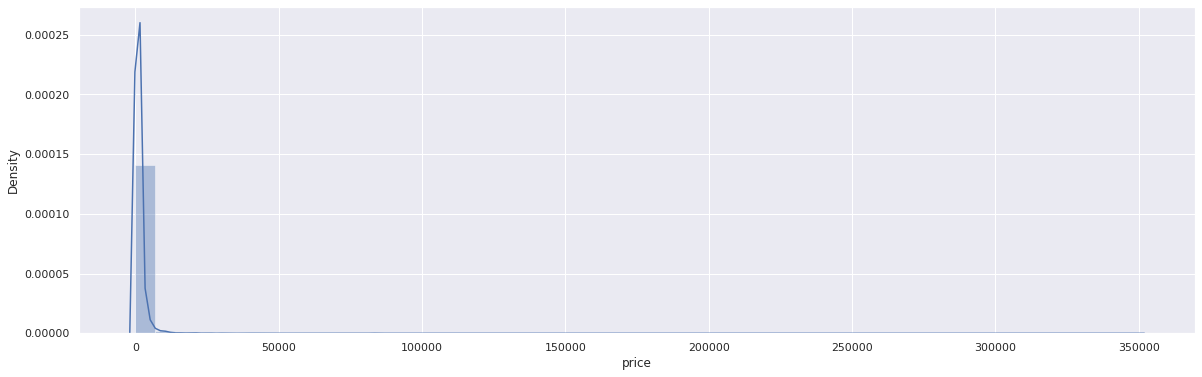

In [ ]:
# Distplot

# f,ax=plt.subplots(figsize=(8,6))
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(df_air['price'],hist=True)

The distribution tells it has positive skew, also the distribution doesn't deviate much from normal distribution.

In [ ]:
# Skewness and Kurtosis
print("Skewness: %f" % df_air['price'].skew())
print("Kurtosis: %f" % df_air['price'].kurt())

Skewness: 37.950618
Kurtosis: 2123.449858


Looks the skew and kurtosis came out very large. Since the skewness has value>1 it is highly skewed. Also kurtosis looks high as well which indicates presence of good amount of outliers,we will look later into that when we handle outliers!!

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


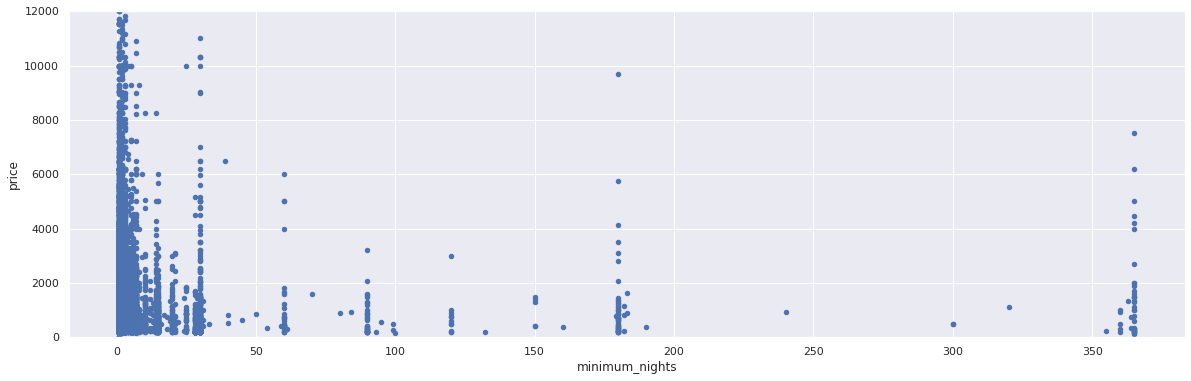

In [ ]:
# Price vs Minimum_nights

var = 'minimum_nights'

data = pd.concat([df_air['price'], df_air[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,12000))

Looks many data points are clustured on low price range, few have min nights for stay but price is 0. looks like anomaly in price.
there are many outliers as well.

<function matplotlib.pyplot.show>

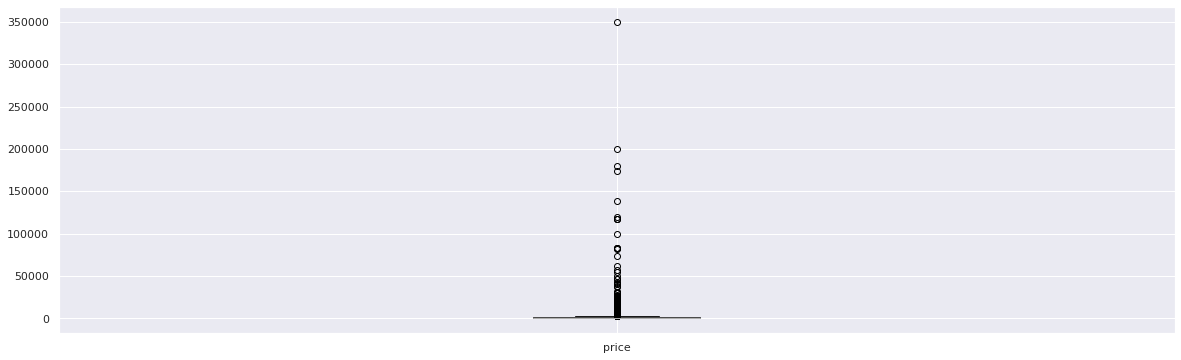

In [ ]:
df_air.boxplot(column=['price'])
plt.show
#we can see the presence of many outliers in price. Definitely we'll remove those.

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19655 non-null  int64  
 1   name                            19652 non-null  object 
 2   host_id                         19655 non-null  int64  
 3   host_name                       19654 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   19655 non-null  object 
 6   latitude                        19655 non-null  float64
 7   longitude                       19655 non-null  float64
 8   room_type                       19655 non-null  object 
 9   price                           19655 non-null  int64  
 10  minimum_nights                  19655 non-null  int64  
 11  number_of_reviews               19655 non-null  int64  
 12  last_review                     

Let's check the correlation matrix to understand how are the features interrelated with each other.
And also to get an idea which are the most important features in this data.

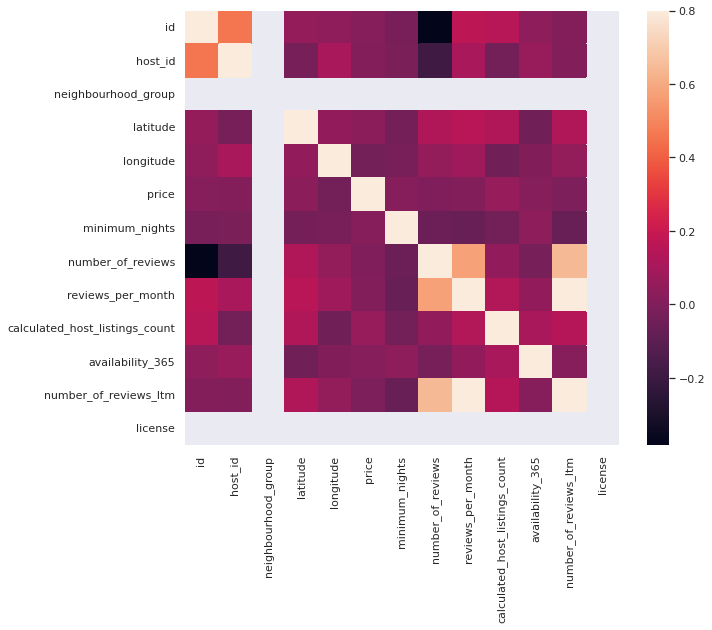

In [ ]:
# Correlation Matrix

corrmat = df_air.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=0.8, square=True)

From the heatmap we can see the correlation between different features that can affect a airbnb listing.

There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

# Data Pre-processing

In [ ]:
# Checking null values!

df_air.isnull().sum()

id                                    0
name                                  3
host_id                               0
host_name                             1
neighbourhood_group               19655
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3977
reviews_per_month                  3977
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           19655
dtype: int64

## Missing values

Since host_names and names are not that important in our analysis, we can at least fill them with some substitutes in both columns! 

Since both 'name' and 'host_name' have very less missing values as compared to 19655 listings and unique hosts! We can fill these missing values in both with unknown & no_name respectively!


In [ ]:
df_air['name'].fillna('unknown', inplace=True)
df_air['host_name'].fillna('no_name', inplace=True)

In [ ]:
df_air[['host_name', 'name']].isnull().values.any()

False

In [ ]:
no_of_hosts = df_air['host_name'].nunique()
print(f'The number of hosts in CDMX: {no_of_hosts}')
no_of_list = df_air['name'].nunique()
print(f'The total number of listings in CDMX: {no_of_list}')

The number of hosts in CDMX: 3513
The total number of listings in CDMX: 19078


Also column: 'last_review' has many null values. And since it is not very necessary for our analysis compared to number_of_reviews and reviews_per_month. We are fine to remove this column along with 'neighborhood_group', 'license'.

In [ ]:
df_air = df_air.drop(['last_review', 'neighbourhood_group', 'license'],axis=1)

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19655 non-null  int64  
 1   name                            19655 non-null  object 
 2   host_id                         19655 non-null  int64  
 3   host_name                       19655 non-null  object 
 4   neighbourhood                   19655 non-null  object 
 5   latitude                        19655 non-null  float64
 6   longitude                       19655 non-null  float64
 7   room_type                       19655 non-null  object 
 8   price                           19655 non-null  int64  
 9   minimum_nights                  19655 non-null  int64  
 10  number_of_reviews               19655 non-null  int64  
 11  reviews_per_month               15678 non-null  float64
 12  calculated_host_listings_count  

### **Checking for duplicate data**

In [ ]:
duplicate_data = df_air.duplicated()
print(duplicate_data.sum())
df_air[duplicate_data]


0


Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []


Looks like there's no duplicate data present!

The reviews_per_month column containing null values and we can simple put 0 reviews by replacing NAN's
makes sense right?

In [ ]:
df_air['reviews_per_month'] = df_air['reviews_per_month'].replace(to_replace = np.nan, value=0).astype('int64')

In [ ]:
df_air['reviews_per_month'].isnull().values.any()

False

#### **Let's check the most no of listings in CDMX first!**

In [ ]:
# Top 5 listings on Airbnb in entire CDMX

listing_count_df = df_air['name'].value_counts()[:5].reset_index()
listing_count_df.rename(columns = {'index':'Listings on Airbnb', 'name':'Total_listings'}, inplace=True)
listing_count_df

Listings on Airbnb  Total_listings
0                        Perfect Loft great Location              45
1             Single and shared rooms near downtown.              24
2                                     Beautiful 2BDR              12
3  Del Valle,depto amueblado completo para 4 pers...              12
4      Hotel Amigo Suites,  CDMX, 1 Cama matrimonial              12

Perfect Loft great Location is found to have listed more listings in entire NYC, followed by Single and shared rooms near downtown.


In [ ]:
#top 10 hosts on the basis of no of listings 
top_10_hosts = df_air['host_name'] .value_counts()[:10]
top_10_hosts

Luis         238
Alejandro    204
Carlos       197
Eduardo      193
Jorge        172
Raquel       172
Ricardo      163
Alejandra    160
Rodrigo      159
David        155
Name: host_name, dtype: int64

Text(0.5, 1.0, 'Top host on the basis of number of listings')

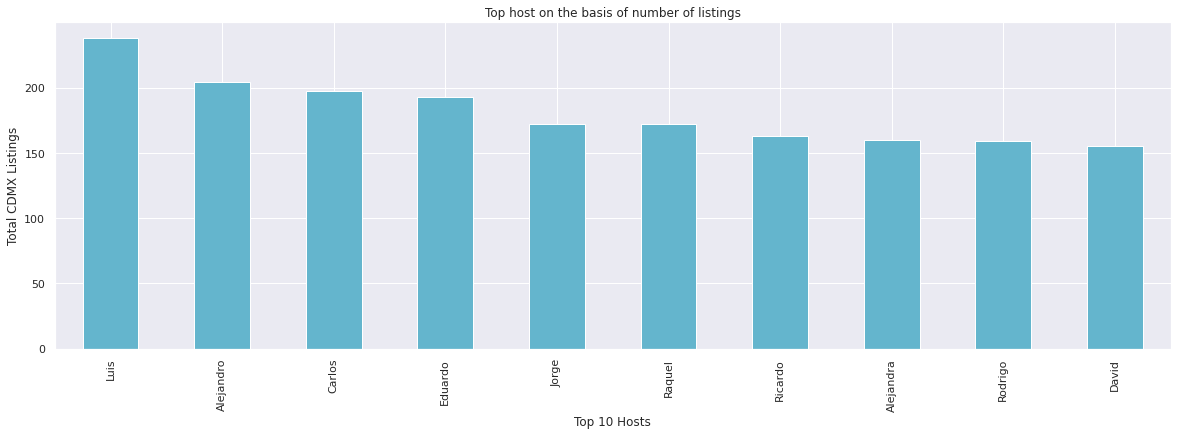

In [ ]:
top_10_hosts.plot(kind='bar', color='c')
plt.xlabel('Top 10 Hosts')
plt.ylabel('Total CDMX Listings')
plt.title('Top host on the basis of number of listings')

In [ ]:
df_air['neighbourhood'].unique()

array(['Cuajimalpa de Morelos', 'Cuauhtémoc', 'Coyoacán',
       'Miguel Hidalgo', 'Benito Juárez', 'Iztacalco', 'Tlalpan',
       'La Magdalena Contreras', 'Venustiano Carranza', 'Álvaro Obregón',
       'Gustavo A. Madero', 'Iztapalapa', 'Xochimilco', 'Azcapotzalco',
       'Tláhuac', 'Milpa Alta'], dtype=object)

Text(0.5, 1.0, 'Top Neighbourhood in Entire CDMX on the basis of count of listings')

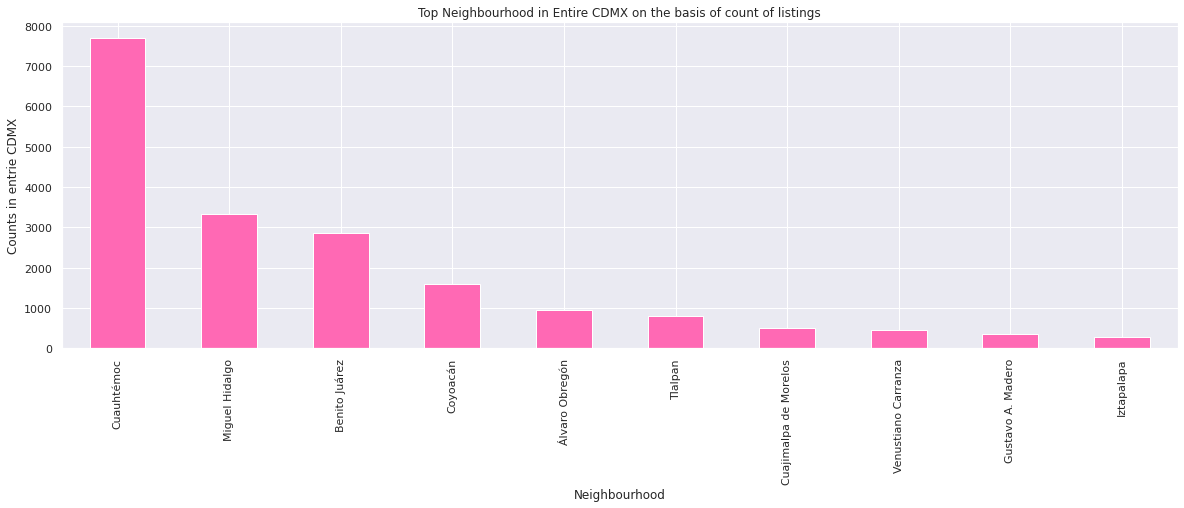

In [ ]:
#checking top 10 neighbourhoods on the basis of numbers of listings
top_10_hosts = df_air['neighbourhood'].value_counts()[:10]
top_10_hosts.plot(kind='bar', color='hotpink')
plt.xlabel('Neighbourhood')
plt.ylabel('Counts in entrie CDMX')
plt.title('Top Neighbourhood in Entire CDMX on the basis of count of listings')

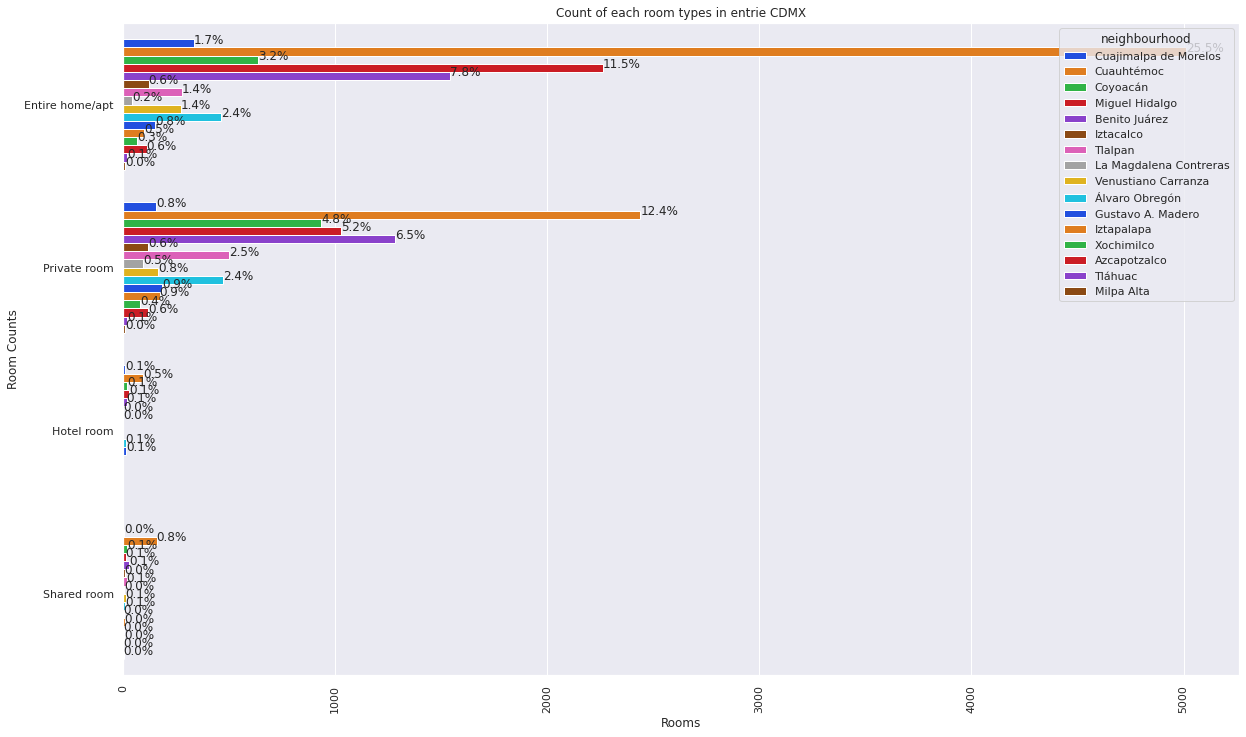

In [ ]:
plt.rcParams['figure.figsize'] = (20,12)
ax = sns.countplot(y='room_type', hue='neighbourhood', data=df_air, palette='bright')

total = len(df_air['room_type'])
for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_width()/total)
      x = p.get_x() + p.get_width() + 0.02
      y = p.get_y() + p.get_height()/2
      ax.annotate(percentage, (x,y))

plt.title('Count of each room types in entrie CDMX')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

Cuauhtémoc has more listed properties with Entire home/apt around 25.5% of total listed properties followed by Miguel Hidalgo with around 11.5%.

Private rooms are more in Cuauhtémoc as in 12.4% of the total listed properties followed by Tláhuac with 6.5% of them. While 5.2% of private rooms are from Miguel Hidalgo.

Very few of the total listed have shared rooms and hotel room listed on Airbnb where there's negligible or almost very rare shared rooms.


### Let's look at the distribution of the listings with availability!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


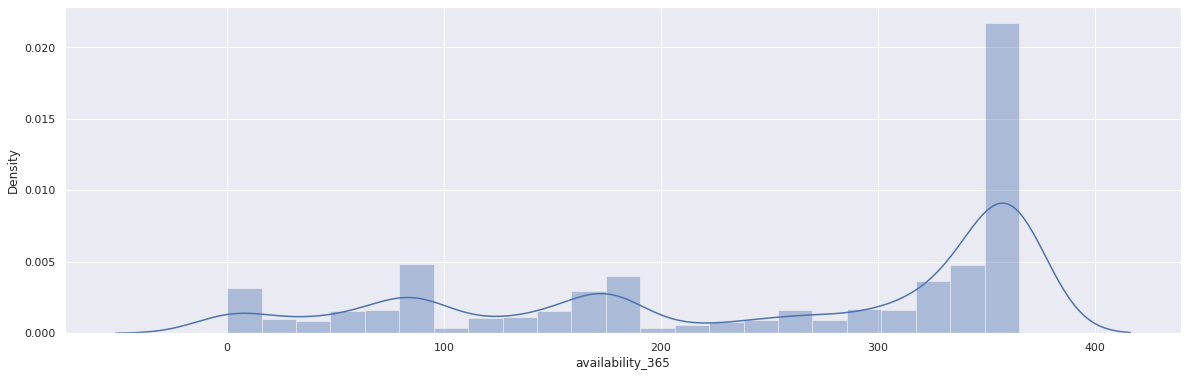

In [ ]:
# Distribution of listings availability at CDMX
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(df_air['availability_365'],hist=True)

availability_365 have uniform distribution with availability ranging from 0 to 370

The distribution isskewed towards right.

Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers) as below:

In [ ]:
# Skewness and Kurtosis
print("Skewness: %f" % df_air['availability_365'].skew())
print("Kurtosis: %f" % df_air['availability_365'].kurt())

Skewness: -0.595911
Kurtosis: -1.154304


Reviews/month distribution as per listings


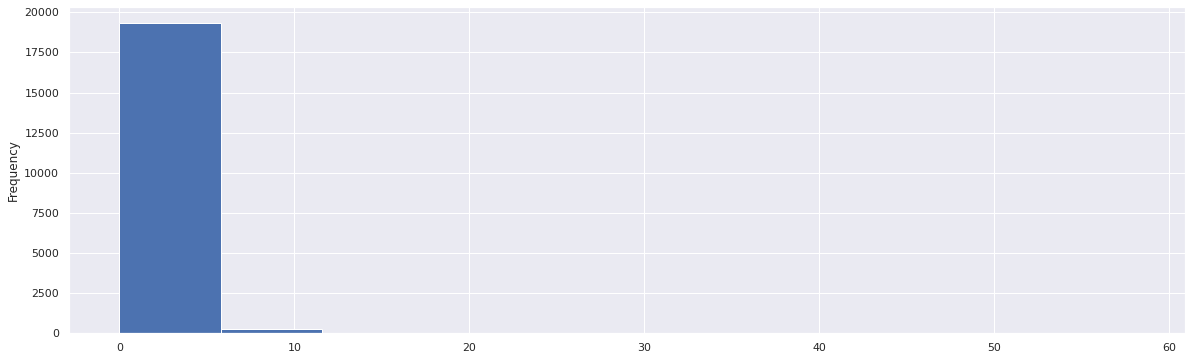

In [ ]:
df_air['reviews_per_month'].plot.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


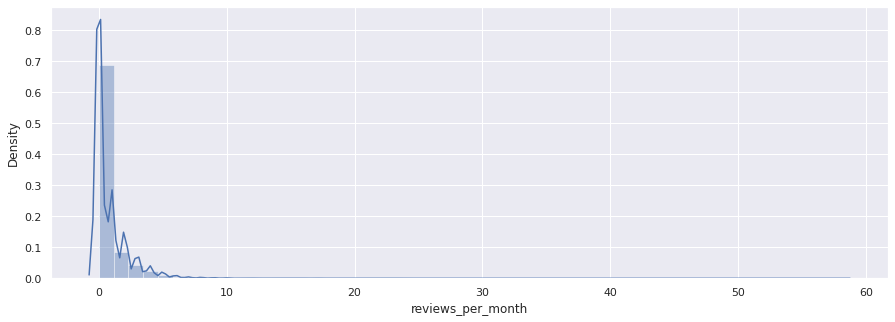

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df_air['reviews_per_month'])

Looks the reviews_per_month is positively skewed(high) towards right with longer tails indicating the presence of outliers.

Moreover, from the two distribution we can infer that monthly reviews goes from 0-10 and it ranges till 60 at highest.

In [ ]:
# Skewness and Kurtosis
print("Skewness: %f" % df_air['reviews_per_month'].skew())
print("Kurtosis: %f" % df_air['reviews_per_month'].kurt())

Skewness: 9.924378
Kurtosis: 211.318622


Both skewness and kurtosis are much high, indicates presence of large amount of outliers.

#### **Handling the outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


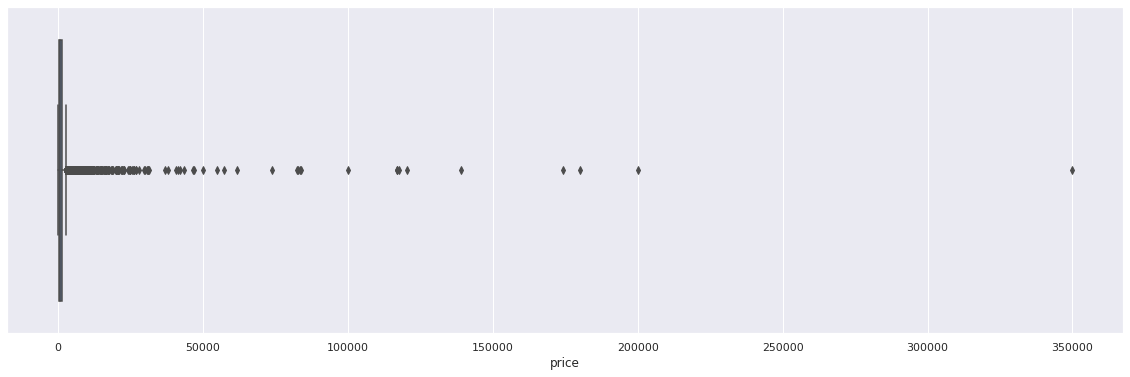

In [ ]:
sns.boxplot(df_air['price'])

In [ ]:
df_air.describe()

id       host_id      latitude     longitude          price  \
count  1.965500e+04  1.965500e+04  19655.000000  19655.000000   19655.000000   
mean   3.586491e+07  1.526232e+08     19.399265    -99.168170    1416.597405   
std    1.399836e+07  1.237564e+08      0.046162      0.035796    4660.084482   
min    3.579700e+04  7.365000e+03     19.185340    -99.339630       0.000000   
25%    2.479859e+07  4.591232e+07     19.374395    -99.180700     453.000000   
50%    3.892742e+07  1.225454e+08     19.412040    -99.167970     821.000000   
75%    4.809428e+07  2.415789e+08     19.431140    -99.152940    1443.000000   
max    5.397435e+07  4.372112e+08     19.555880    -98.963360  350000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    19655.000000       19655.000000       19655.000000   
mean         4.693564          28.971356           0.839786   
std         21.362413          52.010694           1.819225   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.000000   
50%          2.000000           8.000000           0.000000   
75%          3.000000          32.000000           1.000000   
max        365.000000         566.000000          58.000000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    19655.000000      19655.000000           19655.000000  
mean                         8.146985        245.508980               8.741542  
std                         17.922621        123.675444              18.109847  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        143.000000               0.000000  
50%                          2.000000        305.000000               2.000000  
75%                          6.000000        358.000000              10.000000  
max                        140.000000        365.000000             536.000000

I using quantile approach to remove outliers.

In [ ]:
min_threshold, max_threshold = df_air.price.quantile([0.01,0.999])
min_threshold, max_threshold

(210.0, 46670.544000000635)

In [ ]:
#prices less than minimum threshold!
df_air[df_air.price<min_threshold]

id                                               name    host_id  \
209     2506525                      casa en el sur, zona coyoacan   12829914   
265     3168086                Casa con dos dormitorios 9 personas    8539814   
328     3962866                                     FURNISHED ROOM   20538109   
442     5200568     "New york style" very private Basement room :)   12581631   
448     5272066                                      Gay UNAM Room   27291692   
...         ...                                                ...        ...   
19538  53862814    Xola - A Habit. Privada por Metro Xola, Tlalpan  322510577   
19539  53863252  Xola - B Habit. Priv. Metro Xola Viaducto Tlalpan  322510577   
19540  53864089         Xola - C Habit. Privada Metro Xola Tlalpan  322510577   
19545  53867300           Casa lulu particular linda y confortable  253060836   
19654  53974350  Cómoda habitación con dos camas individuales m...  347353318   

           host_name  neighbourhood   latitude  longitude        room_type  \
209            Maluz       Coyoacán  19.316690 -99.169170     Private room   
265         Bernardo     Cuauhtémoc  19.417800 -99.169990  Entire home/apt   
328            Patty     Cuauhtémoc  19.410750 -99.176520     Private room   
442            Pablo  Benito Juárez  19.394820 -99.177470     Private room   
448            Andre       Coyoacán  19.329440 -99.160910      Shared room   
...              ...            ...        ...        ...              ...   
19538  Urbano Suites  Benito Juárez  19.396789 -99.139591     Private room   
19539  Urbano Suites  Benito Juárez  19.398104 -99.140742     Private room   
19540  Urbano Suites  Benito Juárez  19.397848 -99.139386     Private room   
19545        Lourdes       Coyoacán  19.344453 -99.127660     Private room   
19654          Julio       Coyoacán  19.343215 -99.148787     Private room   

       price  minimum_nights  number_of_reviews  reviews_per_month  \
209      208               1                 47                  0   
265      170               1                 32                  0   
328      206               1                  0                  0   
442      205               7                 20                  0   
448      206               1                  3                  0   
...      ...             ...                ...                ...   
19538    197               2                  0                  0   
19539    197               2                  0                  0   
19540    197               2                  0                  0   
19545    200               1                  0                  0   
19654    200               1                  0                  0   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
209                                 1               355                      1  
265                                 7               363                      1  
328                                 1               362                      0  
442                                 6                52                      3  
448                                 2               365                      0  
...                               ...               ...                    ...  
19538                              40               362                      0  
19539                              40               361                      0  
19540                              40               365                      0  
19545                               1               365                      0  
19654                               1               364                      0  

[155 rows x 15 columns]

In [ ]:
#similary for getting extreme price value above max threshold
df_air[df_air.price>max_threshold]

id                                               name    host_id  \
122     1344188            WTC Panoramic Penthouse room w/own bath    7271395   
396     4801896                   Roma/Condesa, Apt 2 habitaciones   20440301   
2241   16391848       Spacious apartment in the heart of the city!   26762960   
4494   23498353               CASA EN PEDREGAL , COLONIAL MEXICANO   28935792   
4614   23895520            Habitación a 40min del centro historico  173103110   
6111   29059504       Nuevo y lujoso Penthouse en Latitud Polanco.   27841247   
6423   30043309                                           Rombo IV  207171317   
6858   31444436                                          No activo  107194368   
7860   33916963          -BEAUTY COZY ROOM ZONA ROSA EMBAJADA US X   66387078   
9426   38024296  2 DESIGNED APTS IN ❤️ OF CONDESA - 8BR-8BATH-2...  418651325   
11087  41615363                                    Casa Vertientes  328124508   
11374  42136595  MEXICAN 2BR -2BATH ❤️ Of CONDESA- WIFI HIGH•SPEED  418651325   
12621  44480861                               Recamaras amuebladas  359602500   
15334  48978515                                    Casa tipo villa  180895600   
16372  50526183  MEXICAN 2BR -2BATH ❤️ Of CONDESA- WIFI HIGH•SPEED  418651325   
16647  50924335                Mr. W | Uma Casa | 9 Premium Suites   10764020   
17294  51750420  Two design apartments up to 24 PPL in ❤️ of Po...  418651325   
18897  53326812  2 DESIGNED APTS IN ❤️ OF CONDESA -6BR-5.5BATH-...  418651325   
18943  53375437  2 DESIGNED APTS IN❤️ OF CONDESA - 6BR-5.5BATH-...  418651325   
18945  53377502  3 DESIGNED APTS IN ❤️OF CONDESA - 8BR-7.5BATH-...  418651325   

          host_name   neighbourhood   latitude  longitude        room_type  \
122    Miguel Angel   Benito Juárez  19.392190 -99.177050     Private room   
396            Hugo      Cuauhtémoc  19.418080 -99.172100  Entire home/apt   
2241   Juan Antonio      Cuauhtémoc  19.429610 -99.158760  Entire home/apt   
4494        Paulina  Álvaro Obregón  19.326260 -99.206030  Entire home/apt   
4614           Ines      Iztapalapa  19.328990 -98.976970     Private room   
6111     Montserrat  Miguel Hidalgo  19.437050 -99.187800  Entire home/apt   
6423           Casa  Miguel Hidalgo  19.402710 -99.253640  Entire home/apt   
6858       Cristina      Cuauhtémoc  19.429420 -99.171700  Entire home/apt   
7860           Iker      Cuauhtémoc  19.430710 -99.163960     Private room   
9426          Stefy      Cuauhtémoc  19.409070 -99.172260  Entire home/apt   
11087         Maria  Miguel Hidalgo  19.412010 -99.229440  Entire home/apt   
11374         Stefy      Cuauhtémoc  19.409070 -99.172260  Entire home/apt   
12621       Vanessa   Benito Juárez  19.395280 -99.161750     Private room   
15334        Sergio         Tlalpan  19.269510 -99.171290     Private room   
16372         Stefy      Cuauhtémoc  19.409204 -99.172455  Entire home/apt   
16647         Mr. W  Miguel Hidalgo  19.426950 -99.213660     Private room   
17294         Stefy  Miguel Hidalgo  19.433807 -99.188751  Entire home/apt   
18897         Stefy      Cuauhtémoc  19.409195 -99.172150  Entire home/apt   
18943         Stefy      Cuauhtémoc  19.409195 -99.172150  Entire home/apt   
18945         Stefy      Cuauhtémoc  19.409195 -99.172150  Entire home/apt   

        price  minimum_nights  number_of_reviews  reviews_per_month  \
122     82891               3                214                  2   
396     99999             100                373                  4   
2241    50000               1                 27                  0   
4494    73753             160                  0                  0   
4614   350000               1                  0                  0   
6111    46974               1                  7                  0   
6423    57304               2                  2                  0   
6858    55000               2                  0                  0   
7860   200000               1    

In [ ]:
df_air_pnw = df_air[(df_air.price>min_threshold) & (df_air.price<max_threshold)]

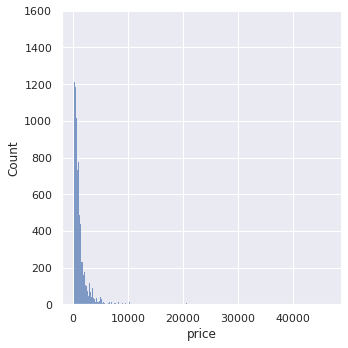

In [ ]:
sns.displot(df_air_pnw['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


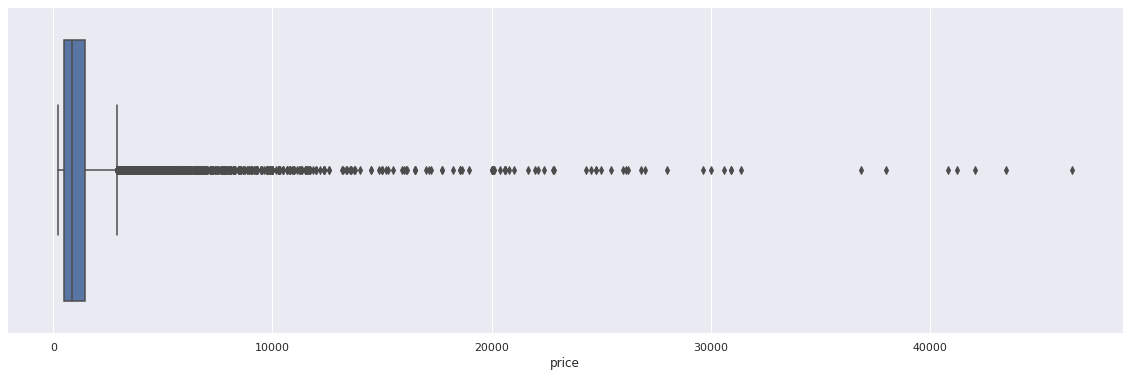

In [ ]:
# There are still many outliers!
sns.boxplot(df_air_pnw['price'])

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_air_pnw['price'].skew())
print("Kurtosis: %f" % df_air_pnw['price'].kurt())

Skewness: 8.335682
Kurtosis: 113.385440


#### **Removing Outliers using IQR approach!** 

In [ ]:
Q1 = df_air.quantile(0.25)
Q3 = df_air.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                2.329569e+07
host_id                           1.956666e+08
latitude                          5.674500e-02
longitude                         2.776000e-02
price                             9.900000e+02
minimum_nights                    2.000000e+00
number_of_reviews                 3.100000e+01
reviews_per_month                 1.000000e+00
calculated_host_listings_count    5.000000e+00
availability_365                  2.150000e+02
number_of_reviews_ltm             1.000000e+01
dtype: float64


In [ ]:
import re
from numpy.ma.core import sort
# outlier function for removing outliers
def outlier_treatment(datacolumn):
      sorted(datacolumn)
      Q1,Q3 = np.percentile(datacolumn, [25,75])
      IQR = Q3 - Q1
      lower_range = Q1 - (1.5 * IQR)
      upper_range = Q3 + (1.5 * IQR)

      return lower_range, upper_range

In [ ]:
lower_bound, upper_bound = outlier_treatment(df_air['price'])

In [ ]:
#looking at the low and upper range outliers
df_air[(df_air.price < lower_bound) | (df_air.price > upper_bound)]

id                                               name    host_id  \
0         35797                                        Villa Dante     153786   
1         44616                                  CONDESA HAUS  B&B     196253   
6        107078                                 NEW  DESIGNER LOFT     540705   
8        165772       BEST 4BR 4 BH HOUSE IN S. MIGUEL CHAPULTEPEC     790208   
16       256555                GREAT HOUSE IN S MIGUEL CHAPULTEPEC     790208   
...         ...                                                ...        ...   
19619  53949279  Incredible Lux Apartment in the heart of Polanco.  302431514   
19622  53951009   Amazing Posh Apartment in the heart of Polanco !  302431514   
19637  53956627                       Mr.W | Chic 1 BR | Fast WiFi   10764020   
19638  53956969                In the heart of the heart of Mexico  431645813   
19641  53959149                Roma Signature | 2BR | Top Location   10764020   

                                host_name          neighbourhood   latitude  \
0                                    Dici  Cuajimalpa de Morelos  19.382830   
1      Condesa Haus Bed & Breakfast  CDMX             Cuauhtémoc  19.411620   
6                                  Andrea         Miguel Hidalgo  19.432110   
8                              Maria Jose         Miguel Hidalgo  19.408260   
16                             Maria Jose         Miguel Hidalgo  19.406630   
...                                   ...                    ...        ...   
19619                               Arely         Miguel Hidalgo  19.432627   
19622                               Arely         Miguel Hidalgo  19.431294   
19637                               Mr. W             Cuauhtémoc  19.416690   
19638                               David               Coyoacán  19.348185   
19641                               Mr. W             Cuauhtémoc  19.420407   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0     -99.271780  Entire home/apt   4123               1                  0   
1     -99.177940  Entire home/apt  15000               1                 50   
6     -99.193270  Entire home/apt   3878               4                 10   
8     -99.186590  Entire home/apt   4125               2                273   
16    -99.186530  Entire home/apt   4125               2                285   
...          ...              ...    ...             ...                ...   
19619 -99.194958  Entire home/apt   3200               3                  0   
19622 -99.195013  Entire home/apt   4000               3                  0   
19637 -99.176860  Entire home/apt   5198               1                  0   
19638 -99.163374  Entire home/apt   3298               2                  0   
19641 -99.164781  Entire home/apt   3168               1                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                      0                               1               363   
1                      0                              10               344   
6                      0                               3               315   
8                      2                               6               294   
16                     2                               6               293   
...                  ...                             ...               ...   
19619                  0                              20                82   
19622                  0                              20                76   
19637                  0                              68               365   
19638                  0                               1               364   
19641                  0                              68               361   

       number_of_reviews_ltm  
0                          0  
1                          1  
6                          0  
8                          6  
16                        16  
...                

subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively


In [ ]:
df_air_pnw1 = df_air[(df_air.price > lower_bound) & (df_air.price < upper_bound)]
df_air_pnw1

id                                               name    host_id  \
2         56074               Great space in historical San Rafael     265650   
3         61792  Spacious Clean Quiet room (own bath) in la Con...     299558   
4         67703                  2 bedroom apt. deco bldg, Condesa     334451   
5         70644   Beautiful light Studio Coyoacan- full equipped !     212109   
7        131610                                     MARIA DEL ALMA     647454   
...         ...                                                ...        ...   
19650  53970957                          Roma Norte cozy apartment   60203647   
19651  53972348      Amazing apartment in the best area of Polanco    5126969   
19652  53972929  Loft Tecamachalco 500m de Palmas Lomas Chapult...  437211246   
19653  53974082  Cuarto Privado Mediano -PH Compartido, Lomas CDMX   21823424   
19654  53974350  Cómoda habitación con dos camas individuales m...  347353318   

              host_name   neighbourhood   latitude  longitude  \
2                 Maris      Cuauhtémoc  19.439770 -99.156050   
3               Roberto      Cuauhtémoc  19.410830 -99.180570   
4              Nicholas      Cuauhtémoc  19.411520 -99.168570   
5                Trisha        Coyoacán  19.354480 -99.162170   
7              Fernando        Coyoacán  19.354160 -99.164880   
...                 ...             ...        ...        ...   
19650        Alex Y May      Cuauhtémoc  19.414141 -99.164360   
19651      Jose Alfonso  Miguel Hidalgo  19.429930 -99.185967   
19652  Maria Del Carmen  Miguel Hidalgo  19.429134 -99.226526   
19653          Federico  Miguel Hidalgo  19.419214 -99.233233   
19654             Julio        Coyoacán  19.343215 -99.148787   

             room_type  price  minimum_nights  number_of_reviews  \
2      Entire home/apt    600               2                 66   
3         Private room   1237               2                 53   
4      Entire home/apt   1959               4                 39   
5      Entire home/apt   1606               4                106   
7         Private room   1403               1                  0   
...                ...    ...             ...                ...   
19650  Entire home/apt    905               1                  1   
19651  Entire home/apt   1520               2                  0   
19652     Private room    480               7                  0   
19653     Private room    339               1                  0   
19654     Private room    200               1                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
2                      0                               2               364   
3                      1                               1               178   
4                      0                               2               332   
5                      0                               3               114   
7                      0                               3                82   
...                  ...                             ...               ...   
19650                  1                              10               341   
19651                  0                               1               362   
19652                  0                               1               328   
19653                  0                               1               180   
19654                  0                               1               364   

       number_of_reviews_ltm  
2                         10  
3                          1  
4                          0  
5                          4  
7                          0  
...                      ...  
19650                      1  
19651                      0  
19652                      0  
19653                      0  
19654                      0  

[18085 rows x 15 columns]

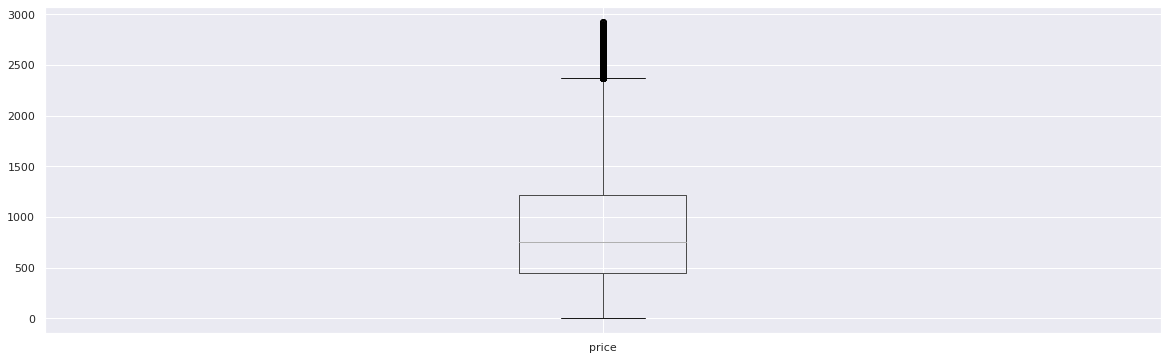

In [ ]:
df_air_pnw1.boxplot(column='price')

the boxplot for price now looks good without outliers

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_air_pnw1['price'].skew())
print("Kurtosis: %f" % df_air_pnw1['price'].kurt())

Skewness: 1.101012
Kurtosis: 0.617695


Let's check for the distribution of this new price as well.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


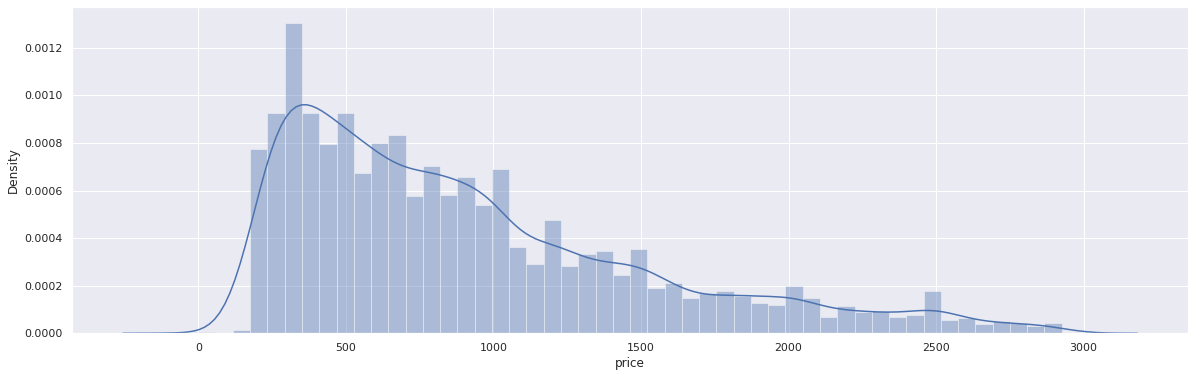

In [ ]:
sns.distplot(df_air_pnw1['price'])

#### **Bi-variate Analysis**

Now let's understand the distribution of price(without extreme values) along neighbourhood groups

In [ ]:
df_air_pnw1['neighbourhood'].value_counts()

Cuauhtémoc                6945
Miguel Hidalgo            2861
Benito Juárez             2780
Coyoacán                  1544
Álvaro Obregón             898
Tlalpan                    767
Cuajimalpa de Morelos      457
Venustiano Carranza        440
Gustavo A. Madero          344
Iztapalapa                 268
Iztacalco                  239
Azcapotzalco               225
Xochimilco                 133
La Magdalena Contreras     131
Tláhuac                     37
Milpa Alta                  16
Name: neighbourhood, dtype: int64

**Distribution of price across**

Instead of checking distributions for each categories one by one we can simply do a violin plot for getting the overall statistics for each groups. But we'll get to know the median of price/neighbourhood group.

We can do a seaborn point plot to get the average prices/neighbourhood
Instead of checking distributions for each categories one by one we can simply do a violin plot for getting the overall statistics for each groups. But we'll get to know the median of price/neighbourhood group.

We can do a seaborn point plot to get the average prices/neighbourhood

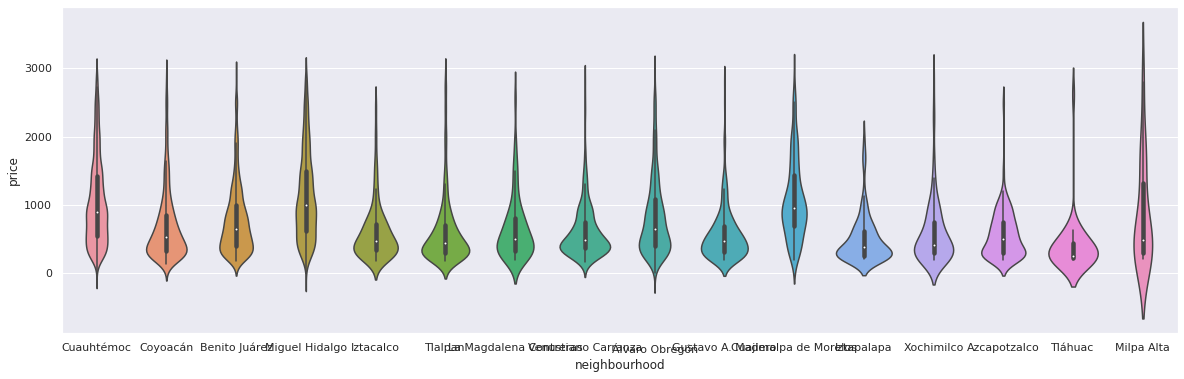

In [ ]:
ax = sns.violinplot(x='neighbourhood', y='price', data=df_air_pnw1)

Como de costumbre Cuauhtémoc, Miguel Hidalgo y también estan Milpa Alta, Cuajimalpa como los lugares más costoso para vivir,  en promedio para los listados.


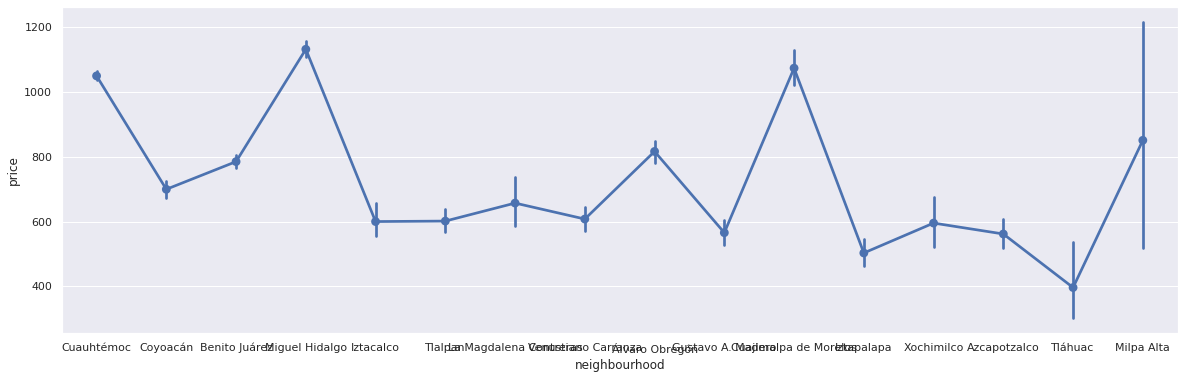

In [ ]:
# Looking for the average price each neighbourhood groups holds in a seaborn pointplot
sns.pointplot(x='neighbourhood', y='price', data=df_air_pnw1, estimator=mean)

We can see that Miguel Hidalgo has the highest(the costliest)  followed by Cuajimalpa de Morelos

Iztalcalco and Magdalena Contreras have the same average price/day, while Tláhuac comes out to be the cheapest neighborhood.

# **Now, Let's check the expensive & cheapest listings with respect to prices leading in entire NYC!**

In [ ]:
# The costliest
df_air_pnw.nlargest(5,'price')[['name','neighbourhood','host_name','room_type']]

name  \
11615  Locacion de lujo para filmaciones, PH Condesa ...   
11186                      Departamento para estudiantes   
16361                    Hermoso y Céntrico Departamento   
17328                      Espacio ÚNICO en la Del Valle   
6418                                            Rombo II   

               neighbourhood host_name        room_type  
11615             Cuauhtémoc      Juan     Private room  
11186      Gustavo A. Madero    Manuel     Private room  
16361             Cuauhtémoc     Diego  Entire home/apt  
17328          Benito Juárez     Marco  Entire home/apt  
6418   Cuajimalpa de Morelos      Casa  Entire home/apt

In [ ]:
# The cheapest
df_air_pnw.sort_values(by='price',ascending=True)[['name','neighbourhood','host_name','room_type']][:5]

name        neighbourhood  \
5043           BEDROOM ,AIRPORT20 MINS, DWNTWN20, TAPO10  Venustiano Carranza   
14971  Vive lo natural dentro  CDMX, exclusivo mujeres..              Tlalpan   
9563      Un espacio AGRADABLE dentro de una GRAN ciudad       Miguel Hidalgo   
1894   Nice Room 2 at Coy. w/Independent Access to st...             Coyoacán   
8755                         Habitación con baño privado             Coyoacán   

                       host_name     room_type  
5043                     Leticia  Private room  
14971                    Marcelo   Shared room  
9563                        Nora  Private room  
1894   Gerardo (Mónica'S Father)  Private room  
8755                        Flor  Private room

# Top neighbourhoods in CDMX with respect to average price/day of Airbnb listings:

let's check for the neighbourhoods with listings having highest average price/day in each neighbourhood groups of CDMX

In [ ]:
df_ngrp = df_air_pnw.groupby('neighbourhood')['price'].mean().reset_index()

In [ ]:
top_neigh_each = df_ngrp.loc[df_ngrp.groupby('neighbourhood')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

neighbourhood        price
9           Miguel Hidalgo  1771.350000
10              Milpa Alta  1716.736842
3    Cuajimalpa de Morelos  1548.994000
4               Cuauhtémoc  1513.408212
14              Xochimilco  1209.162963
15          Álvaro Obregón  1196.486022
1            Benito Juárez  1015.300717
8   La Magdalena Contreras   977.126866
2                 Coyoacán   912.211925
5        Gustavo A. Madero   818.875380
11                 Tlalpan   809.574099
7               Iztapalapa   787.161417
6                Iztacalco   729.210084
0             Azcapotzalco   725.405530
13     Venustiano Carranza   686.316629
12                 Tláhuac   606.666667

Text(0, 0.5, 'price')

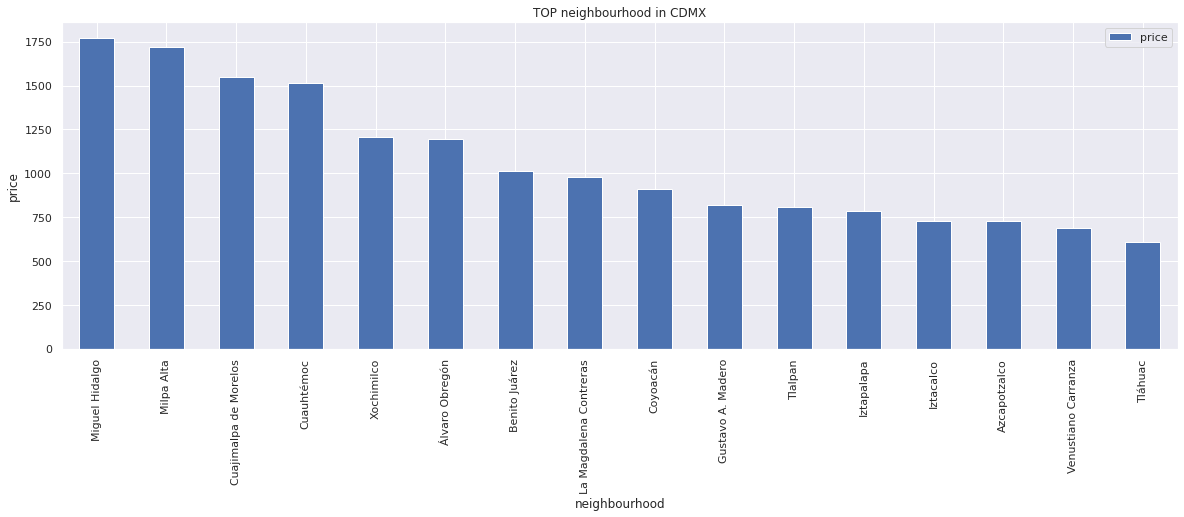

In [ ]:
top_neigh_each.plot.bar(x='neighbourhood', rot=90, title='TOP neighbourhood in CDMX')
plt.xlabel('neighbourhood')
plt.ylabel('price')

# Let's checkout the costliest listings in each neighbourhood groups & their respective hosts:

In [ ]:
# Costliest listings in each neighbourhood groups
costliest_df = df_air_pnw.loc[df_air_pnw.groupby(['neighbourhood'])['price'].idxmax()][['name','neighbourhood', 'host_name','price']]

In [ ]:
costliest_df.sort_values(by='price', ascending=False)

name  \
11615  Locacion de lujo para filmaciones, PH Condesa ...   
11186                      Departamento para estudiantes   
17328                      Espacio ÚNICO en la Del Valle   
6418                                            Rombo II   
1980                    Habitación con excelente paisaje   
11604   Enjoy  Polanco, the best neighborhood as a local   
13725  Hermosa casona cerca San Ángel Capacidad hasta...   
1594        Extraordinary Romm in Coyoacan zone turistic   
5169            RANCHO GUADALUPE  Ajusco Riding Holidays   
13891  especial para persona sola y que guste de tranqui   
13008                           COZY&SPACIOUS 5pax 5room   
13946                                   Cabaña ecológica   
12646      Hermosa Finca campestre rodeada de naturaleza   
5380                Departamento con balcón muy acogedor   
15047  HERMOSA CASA HASTA PARA 55 PERSONAS :) AEROPUERTO   
4733                             Hacienda la Providencia   

                neighbourhood    host_name  price  
11615              Cuauhtémoc         Juan  46510  
11186       Gustavo A. Madero       Manuel  43468  
17328           Benito Juárez        Marco  41251  
6418    Cuajimalpa de Morelos         Casa  40814  
1980               Iztapalapa  Tania Anahi  30920  
11604          Miguel Hidalgo      Alberto  30608  
13725          Álvaro Obregón        Diana  28000  
1594                 Coyoacán         Ruth  20625  
5169                  Tlalpan  Olga&Perico  20613  
13891            Azcapotzalco        Dario  18552  
13008              Xochimilco          Aaa  12347  
13946  La Magdalena Contreras       Susana  12000  
12646              Milpa Alta      Fabiola   8500  
5380      Venustiano Carranza       Karina   7359  
15047               Iztacalco       Lucero   6875  
4733                  Tláhuac     Fernando   3500

**Also, the cheapest listings in each neighbourhood groups & their respective hosts:**

In [ ]:
#cheapest listings in each neighbourhood groups
cheapest_df = df_air_pnw.loc[df_air_pnw.groupby('neighbourhood')['price'].idxmin()][['neighbourhood','name','host_name','price']]

In [ ]:
cheapest_df.sort_values(by='price', ascending=True)

neighbourhood  \
1894                 Coyoacán   
9563           Miguel Hidalgo   
14971                 Tlalpan   
5043      Venustiano Carranza   
7420               Cuauhtémoc   
9533        Gustavo A. Madero   
13575                 Tláhuac   
7653           Álvaro Obregón   
10259            Azcapotzalco   
9946            Benito Juárez   
16170   Cuajimalpa de Morelos   
13461               Iztacalco   
18592              Iztapalapa   
8470               Milpa Alta   
14325              Xochimilco   
11953  La Magdalena Contreras   

                                                    name  \
1894   Nice Room 2 at Coy. w/Independent Access to st...   
9563      Un espacio AGRADABLE dentro de una GRAN ciudad   
14971  Vive lo natural dentro  CDMX, exclusivo mujeres..   
5043           BEDROOM ,AIRPORT20 MINS, DWNTWN20, TAPO10   
7420                     un lugar Acogedor en la Roma MX   
9533                        Cuarto privado en Lindavista   
13575                Rento cuarto en Villa Centroamérica   
7653                    Cómodo cuarto cerca de Santa Fé!   
10259   Habitación cerca del metro camarones y refinería   
9946   Linda habitación con terraza, en Vieja Casona,...   
16170               casa de huespedes segura y tranquila   
13461          Acogedora habitación cerca del Aeropuerto   
18592  Gaming room♥ HomeOffice, Computer, Netflix & more   
8470        Renta de cuarto amueblado en Milpa Alta cdmx   
14325            Apartamento privado al sur de la ciudad   
11953     Departamento completo en CDMX cerca del bosque   

                       host_name  price  
1894   Gerardo (Mónica'S Father)    211  
9563                        Nora    211  
14971                    Marcelo    211  
5043                     Leticia    211  
7420          Ma. De Los Angeles    212  
9533                      Martin    212  
13575                    Fabiola    212  
7653                       Diego    212  
10259                     Magali    213  
9946                        Emma    213  
16170                       Luis    213  
13461                       Hugo    214  
18592                   Jonathan    214  
8470              Jose Guadalupe    216  
14325              Carlos Daniel    220  
11953                    Octavio    237

# Room_types vs price on different neighbourhood groups!

In [ ]:
#unique rooms available throughout city
df_air_pnw['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

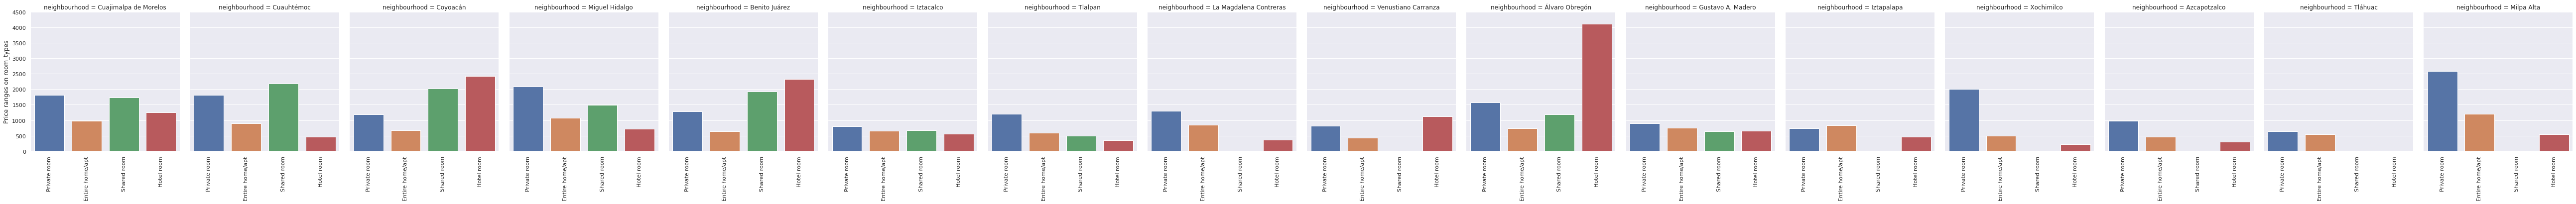

In [ ]:
# Room_type vs price
g = sns.catplot(x="room_type", y="price", col="neighbourhood",
                data=df_air_pnw, saturation=0.8,
                kind="bar", ci=None, aspect=0.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room", "Hotel room"], rotation=90)
  .set(ylim=(0, 4500))
  .despine(left=True))


Looks like a property/listing with Entire home/apt as room_type wins the show at CDMX followed by private rooms.

MIlpa Alta has the highest price for room types with (Entire home/apt) followed by Private room. And it's obvious being the most expensive place to live in!

# On an average for how many nights people stayed in each room_types!

Text(0, 0.5, 'Min Stays')

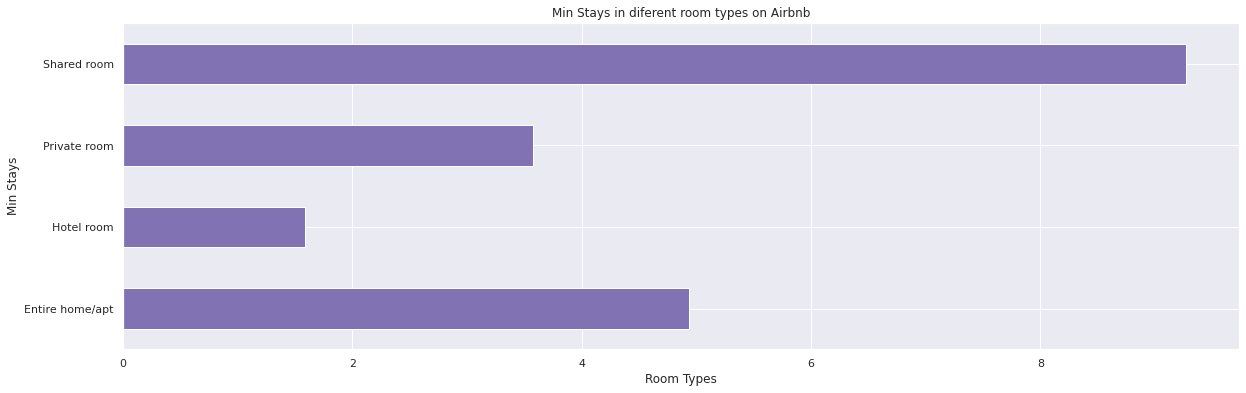

In [ ]:
df_air_pnw.groupby('room_type')['minimum_nights'].mean().plot(kind='barh', color='m')
plt.title('Min Stays in diferent room types on Airbnb')
plt.xlabel('Room Types')
plt.ylabel('Min Stays')

Looking at these it clearly indicates that people mostly prefer living in an Shared room on an average of more than 8 nights followed by guests who stayed in Entire home/apt where average stay is 4-5 nights.

# Let's play around with the reviews on listings in CDMX 

In [ ]:
# Top 10 most reviewed listings in CDMX
top10_reviewed_listings = df_air.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood']]

name  reviews_per_month  \
15228             Habitación Privada Frente a Av Reforma                 58   
15037             Private room in the Zócalo of the City                 56   
16060  Private Room Near Roma Norte Wifi Close to Ref...                 54   
16288  Habitación Muy Económica Cerca del Aeropuerto ...                 45   
14478     Room 5 min from the Monument to the Revolution                 40   
18996           Ayenda Terraza 158, Double Standard Room                 39   
15054         Room with two beds in front of Av. Reforma                 38   
16096  Luxurious & Modern Apt in Roma Norte | Gym+Roo...                 34   
15059              Room At the Angel of Independence B&B                 31   
12929     Room in Garibaldi the best party and vacation!                 30   

             neighbourhood  
15228           Cuauhtémoc  
15037           Cuauhtémoc  
16060           Cuauhtémoc  
16288  Venustiano Carranza  
14478           Cuauhtémoc  
18996       Miguel Hidalgo  
15054           Cuauhtémoc  
16096           Cuauhtémoc  
15059           Cuauhtémoc  
12929           Cuauhtémoc

So, this are the listings with highest number of reviews, the highest being: "Habitación Privada Frente a Av Reforma" with 58 reviews/month followed by "Private room in the Zócalo of the City" with a total of 56 reviews/month. Top 2 are from Cuauhtémoc so we can decide the best suited place for a comfortable stay but the prices are high to afford.

**Also, Lets look how monthly reviews varies with room types in each neighbourhood groups!**

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood')

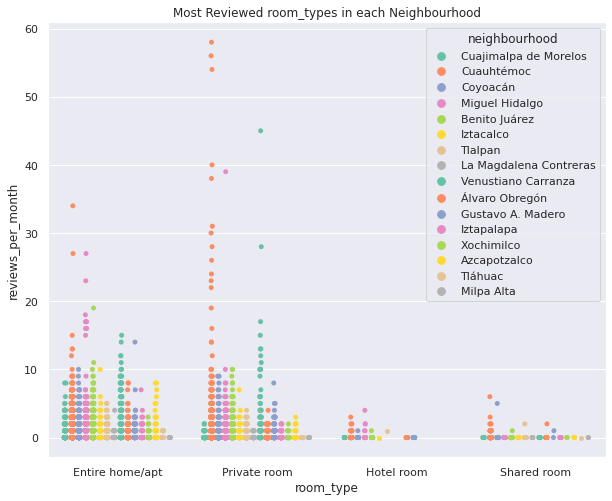

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(x='room_type', y='reviews_per_month', hue='neighbourhood', dodge=True, data=df_air, palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood')

We can see that Private room recieved the most no of reviews/month where Cuahtémoc had the highest reviews received for Private rooms with more than 50 reviews/month, followed by Cuajimalpa in the chase.

Cuahtémoc & Miguel Hidalgo got the most no of reviews for Entire home/apt room type.

There were less reviews recieved from shared rooms and Hotel room as compared to other room types
We can see that Private room recieved the most no of reviews/month where Cuahtémoc had the highest reviews received for Private rooms with more than 50 reviews/month, followed by Cuajimalpa in the chase.

Cuahtémoc & Miguel Hidalgo got the most no of reviews for Entire home/apt room type.

There were less reviews recieved from shared rooms and Hotel room as compared to other room types

**Let's find the top 10 reviewed hosts on the basis of reviews/month.**

Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

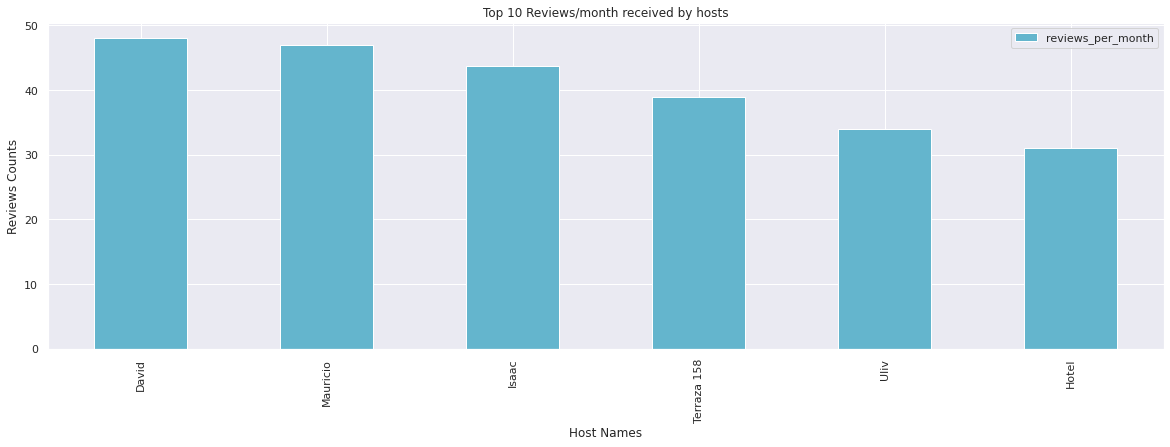

In [ ]:
# There are cases where same hosts are hosting multiple properties in same/different areas.
reviews_df = top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean()
reviews_df = reviews_df.reset_index().sort_values(by='reviews_per_month', ascending=False)
reviews_df.plot(x='host_name', y='reviews_per_month', kind='bar', color='c')
plt.ylabel('Reviews Counts')
plt.xlabel('Host Names')
plt.title('Top 10 Reviews/month received by hosts')

David holds the title as the most reviewed host with more than 40 reviews/month on average.

# Hosts with most no of listings in NYC(on the basis of host listings count)

In [ ]:
host_with_most_listings= df_air.groupby(['host_name','neighbourhood'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

host_name   neighbourhood  calculated_host_listings_count
5252        Raquel      Cuauhtémoc                           10538
4669         Mr. W      Cuauhtémoc                            7233
5254        Raquel  Miguel Hidalgo                            6729
2401          HOMi  Miguel Hidalgo                            5995
2400          HOMi      Cuauhtémoc                            5886
3785          Luis      Cuauhtémoc                            5880
5492  Rosalia Dawn  Miguel Hidalgo                            3807
1059         Casai      Cuauhtémoc                            3726
5491  Rosalia Dawn      Cuauhtémoc                            2754
5250        Raquel   Benito Juárez                            2103

So, "Raquel" leads the most expensive neighbourhood group in City with around 10538 properties listed followed by Mr. W and HOMi.

We can also check for hosts with most listings in each neighbourhood group.

The hosts leading each neighbourhood with most no of Airbnb listings in entire.
So, "Raquel" leads the most expensive neighbourhood group in City with around 10538 properties listed followed by Mr. W and HOMi.

We can also check for hosts with most listings in each neighbourhood group.

The hosts leading each neighbourhood with most no of Airbnb listings in entire.

In [ ]:
host_df = host_with_most_listings.groupby(['neighbourhood'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[host_df].sort_values(by='calculated_host_listings_count', ascending=False)

host_name           neighbourhood  calculated_host_listings_count
5252          Raquel              Cuauhtémoc                           10538
5254          Raquel          Miguel Hidalgo                            6729
5250          Raquel           Benito Juárez                            2103
1201         Claudia   Cuajimalpa de Morelos                             836
2862          Javier                Coyoacán                             487
1188           Clara              Iztapalapa                             361
516           Andres     Venustiano Carranza                             320
1493           Diana          Álvaro Obregón                             234
4038           Marco              Xochimilco                             208
2497          Hostal       Gustavo A. Madero                             169
1372  Daniel Ernesto                 Tlalpan                             121
3558          Leslie               Iztacalco                              81
3750          Lucero               Iztacalco                              81
5998   Urbano Suites            Azcapotzalco                              80
1955         Fabiola              Milpa Alta                              63
3385           Karla  La Magdalena Contreras                              43
4060   Marcos Sergio                 Tláhuac                              25
65          Adelaida                 Tláhuac                              25

So, Raquel, Claudia, Javier... are the hosts with most no of listings in each neighbourhood groups in entire city!
So, Raquel, Claudia, Javier... are the hosts with most no of listings in each neighbourhood groups in entire city!

# Room_types and their relation with availability in different neighbourhood groups!

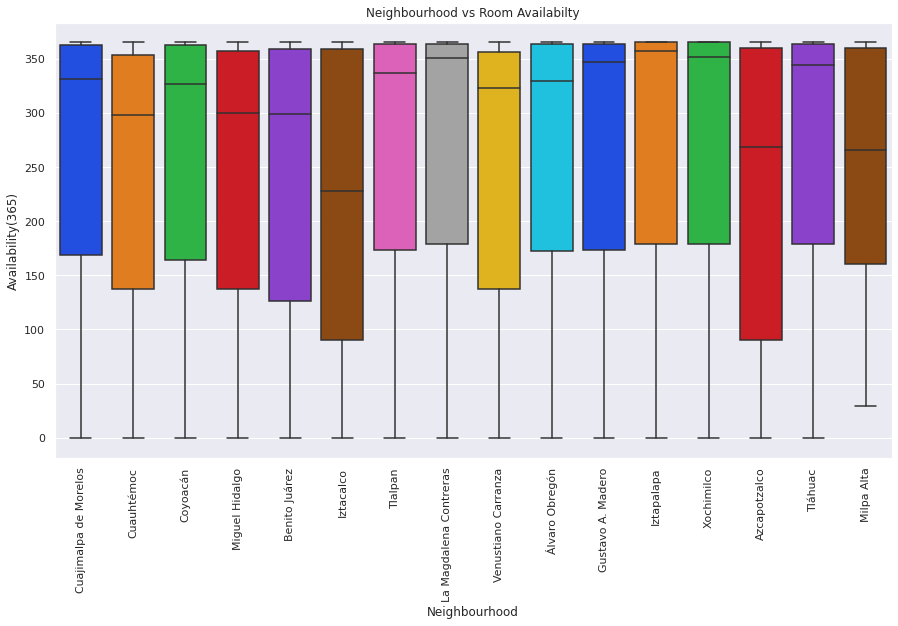

In [ ]:
f, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(x='neighbourhood', y='availability_365', data=df_air, palette="bright")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.title("Neighbourhood vs Room Availabilty")
plt.xlabel('Neighbourhood')
plt.ylabel('Availability(365)')
plt.show()

Looking at the above categorical box plot we can infer that the listings in all seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 300 days.

# Let's see what can be done with latitude and longitude!

Text(0.5, 1.0, 'Location Co-ordinates')

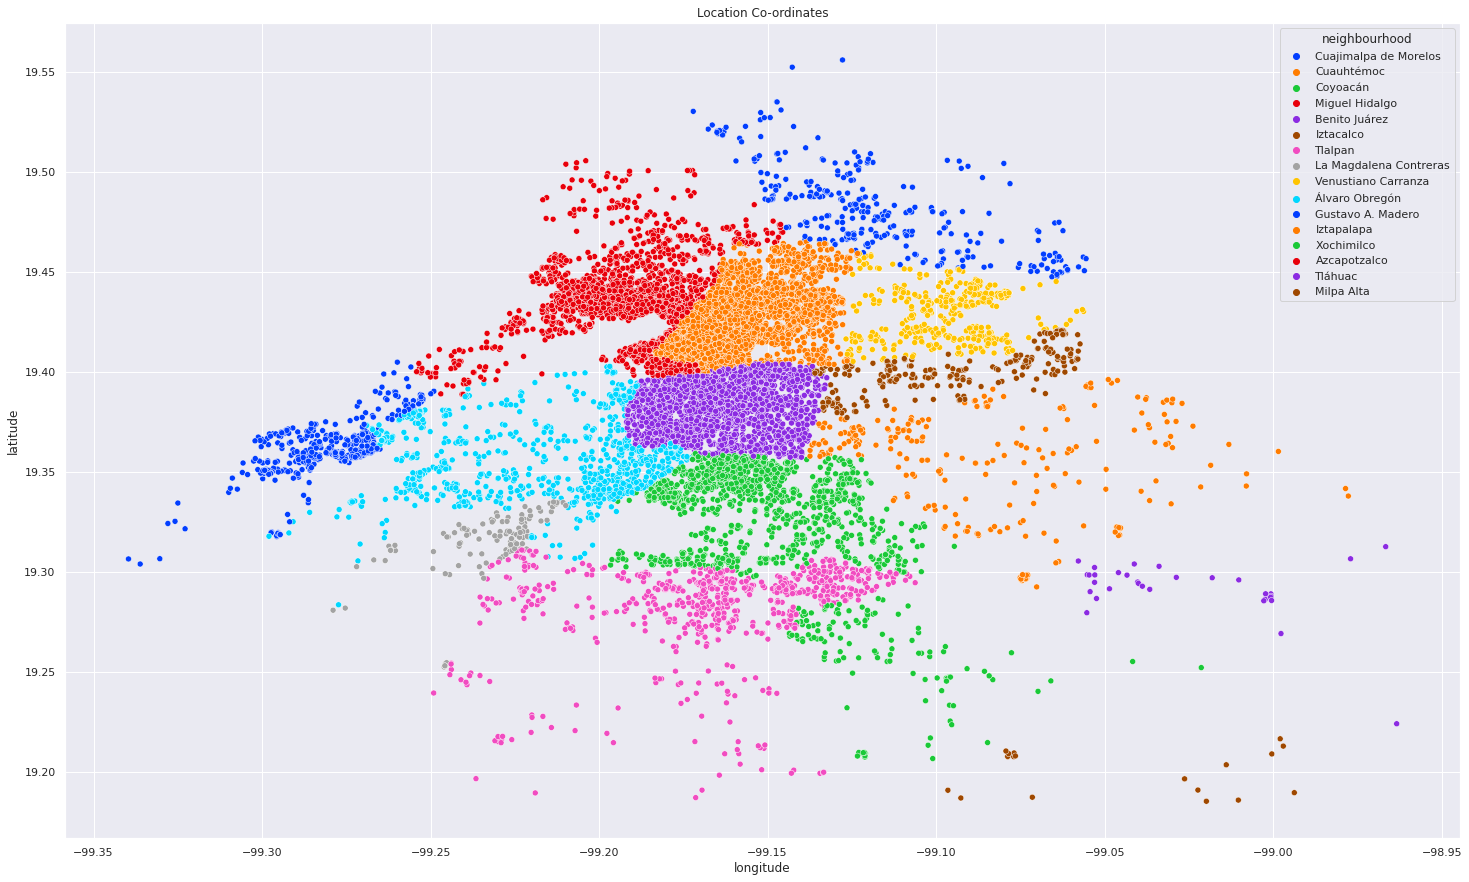

In [ ]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (25,15)})
ax = sns.scatterplot(data=df_air_pnw, x="longitude", y="latitude", hue='neighbourhood', palette='bright')
ax.set_title('Location Co-ordinates')

**Let's observe the type of rooms as well**

Text(0.5, 1.0, 'Distribution of type of rooms across CDMX')

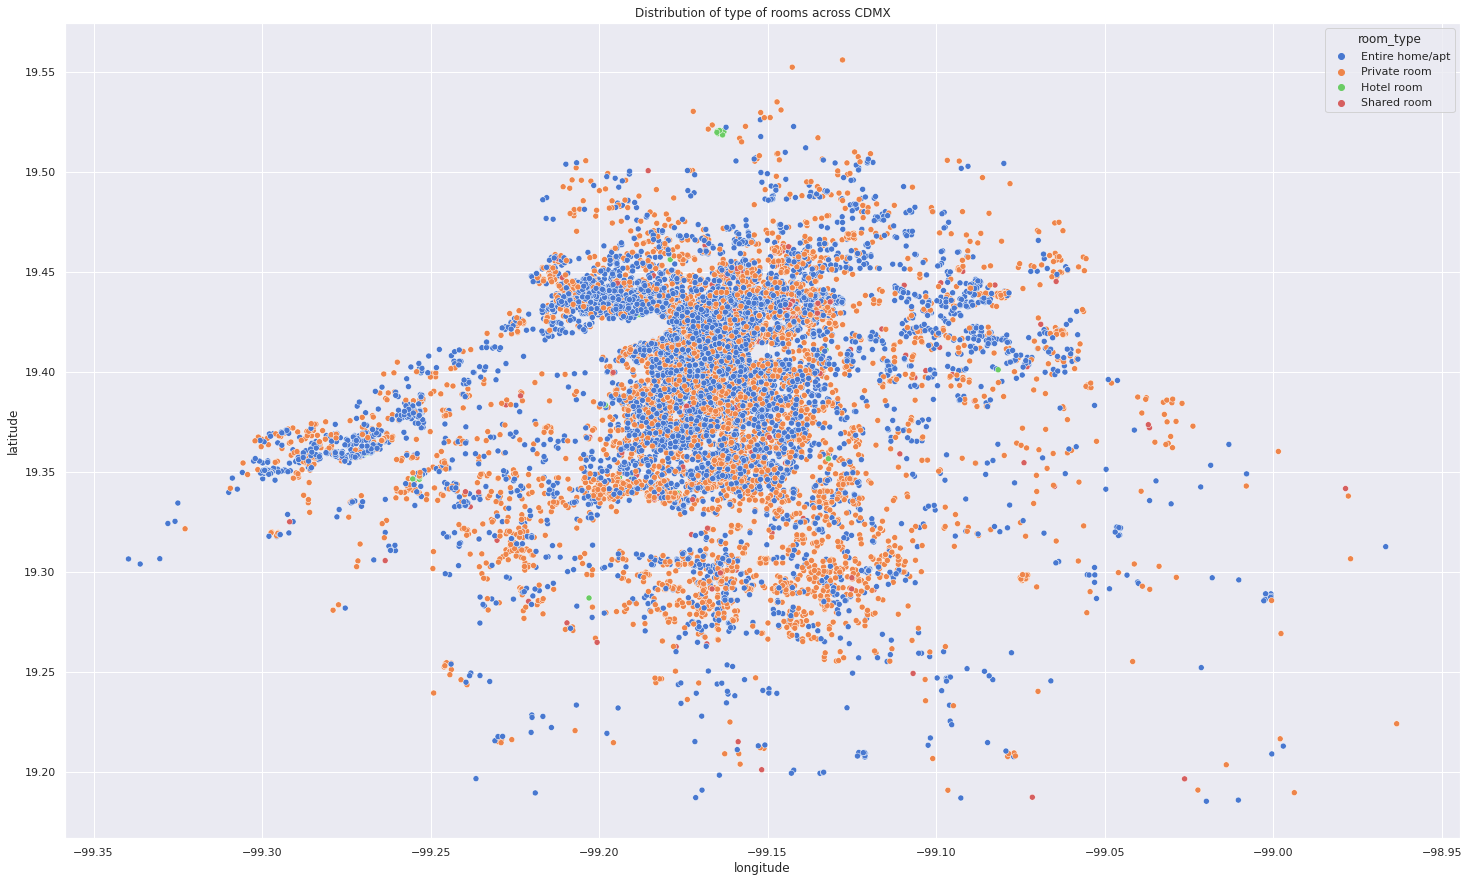

In [ ]:
sns.set(rc={"figure.figsize": (25,15)})
ax= sns.scatterplot(x=df_air_pnw.longitude, y=df_air_pnw.latitude,hue=df_air.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across CDMX')

By the two scatterplots of latitude vs longitude we can infer there's is very less shared room and hotel room throughout city as compared to private and Entire home/apt.

95% of the listings on Airbnb are either Private room or Entire/home apt. 

Let's have an idea of the price variations across these co-ordinates in a more clear way

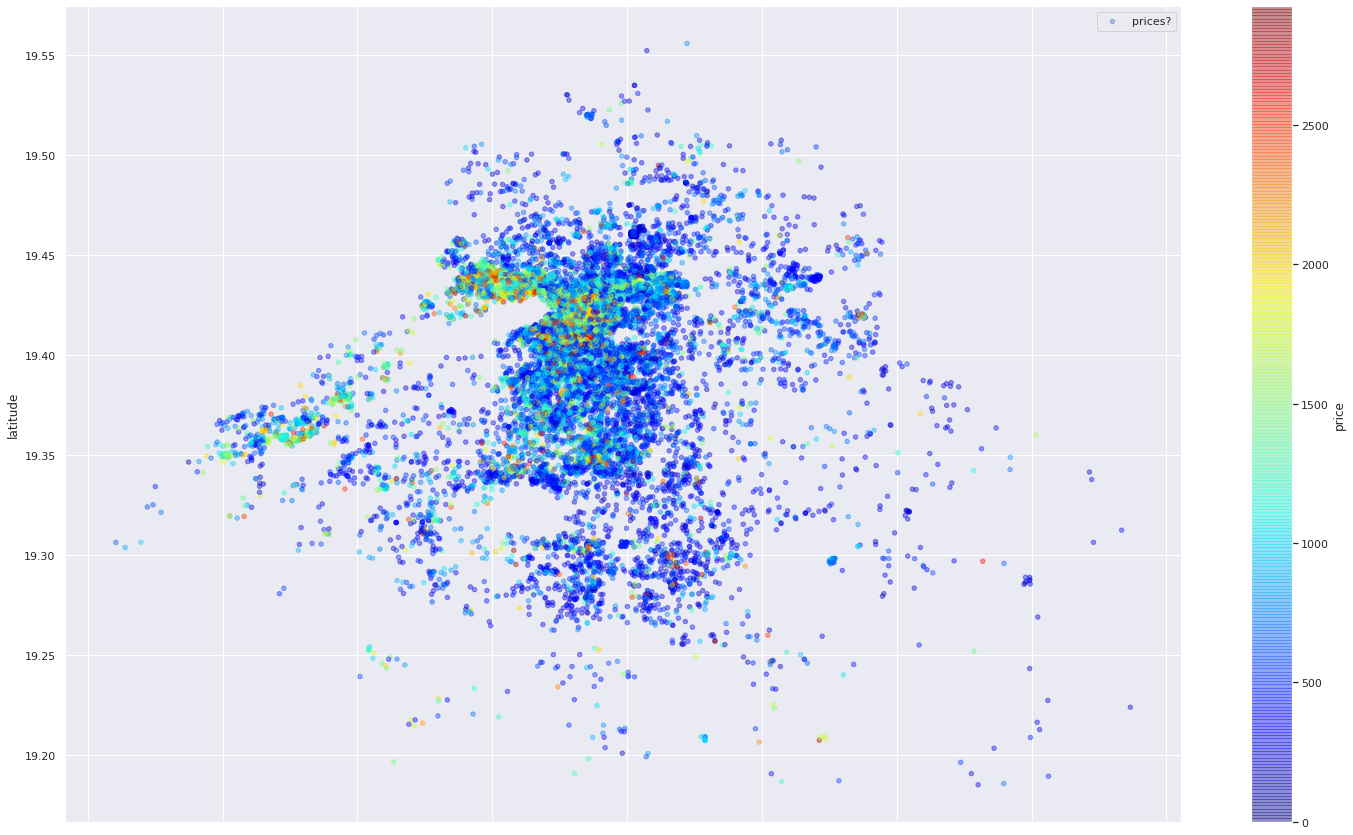

In [ ]:
lat_long = df_air_pnw1.plot(kind='scatter', x='longitude', y='latitude', label='prices?', c='price',
                            cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(25,15))
lat_long.legend()

We can infer that there are high range of prices across in city


**I want to try the scatterplot at the top of the CDMX map with the districts**

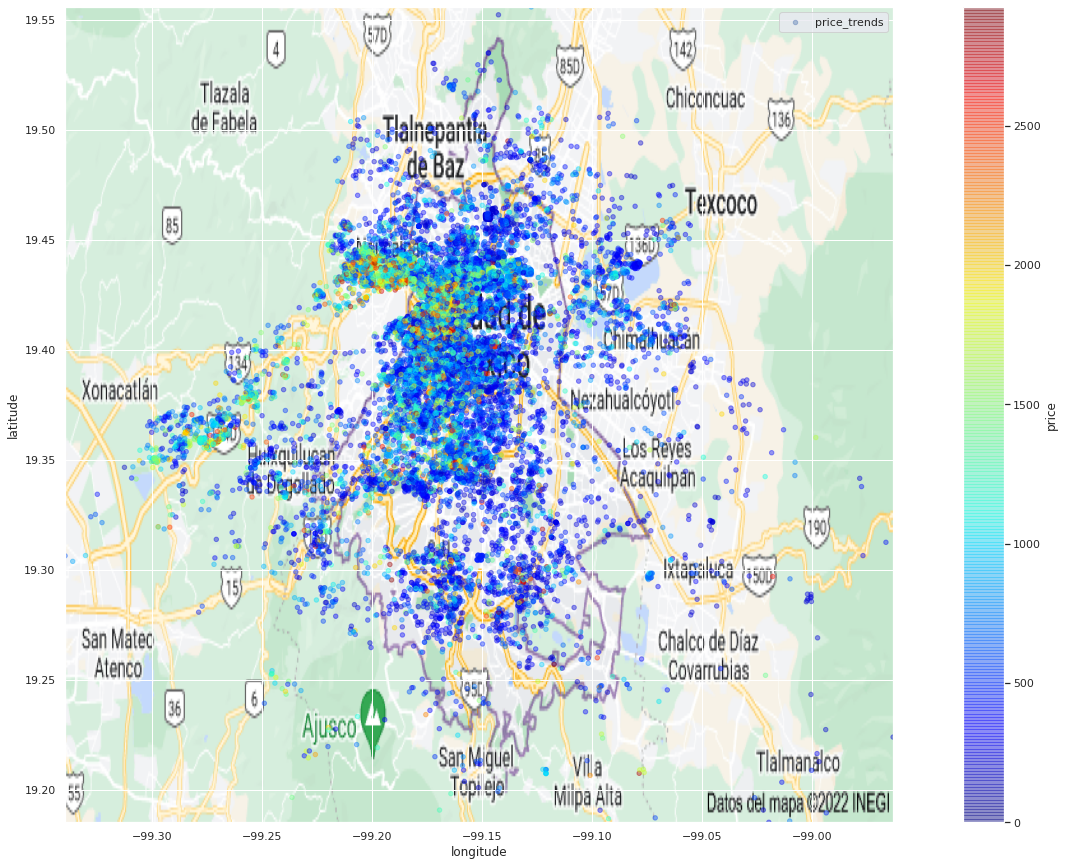

In [ ]:
#saved the original map image in my local directory and read the img using imread function

plt.figure(figsize=(25,15))
img=imread('/content/drive/MyDrive/Colab Notebooks/data/cdmx.png')

plt.imshow(img,zorder=0,extent=[df_air_pnw1['longitude'].min(),df_air_pnw1['longitude'].max(),df_air_pnw1['latitude'].min(),df_air_pnw1['latitude'].max()])
ax = plt.gca()
df_air_pnw1.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price', ax=ax,
                 cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(25,15))

plt.legend()
plt.show()

**Let's look at the listings availability in a year throughout CDMX** 

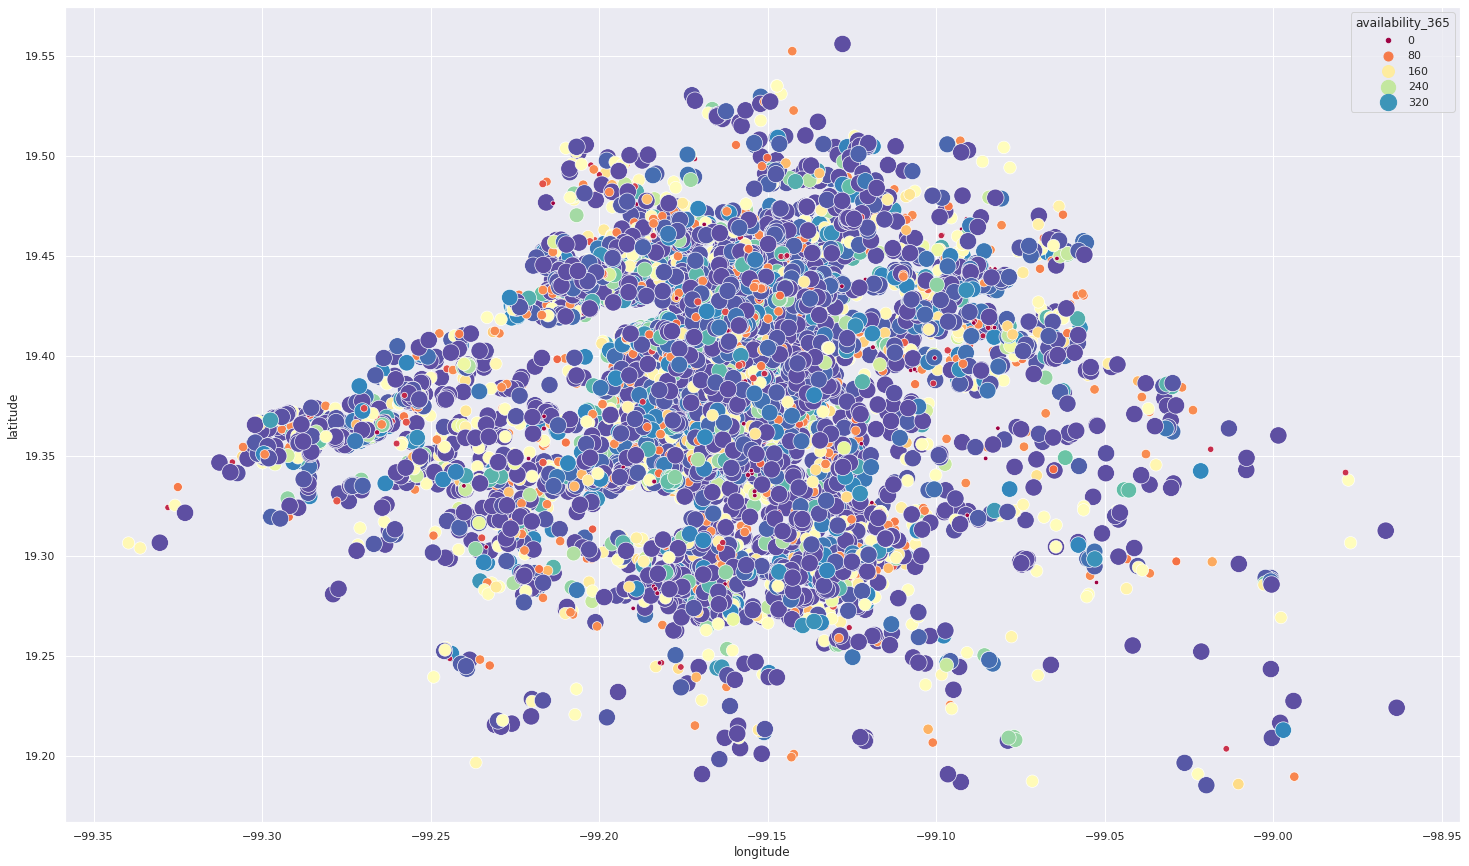

In [ ]:
f, ax = plt.subplots(figsize=(25,15))
ax = sns.scatterplot(data=df_air_pnw1, x='longitude', y='latitude', hue="availability_365", 
                     palette='Spectral', size='availability_365', sizes=(20,300))

I've reached almost the end of the analysis. There might be few analysis which can be done more.

We philosophied about the variables, we analysed 'price' and also checked with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.